# Machine Learning Project: Assessment 3

#### Your Student ID: 201664649

This assessment has a 60% weight.

## 1. Aims, objectives and plan

### a) Aims and objectives (4 marks)
This project aims to analyze marketing campaign data for a Portuguese bank's term deposit plan and to build machine learning models that can predict accurately if a customer will sign up for the term deposit. 

The main objectives of this project are as follows:

1. Understanding the case study statistically and preprocessing the dataset.

1. Carrying out extensive hyperparameter tuning for building optimal models.

1. Training and validating the two selected machine learning models with the preprocessed data.

1. Analyzing models’ performances on the test dataset for the best model selection.


###  b) Plan (2 marks)

The project plan consists of multiple stages, as shown in _Figure 1_. The first stage is data acquisition, in which a publicly available dataset is obtained. The selected dataset will be explored in-depth in the next stage. After the case study analysis, in the following data preparation stage, the dataset will pass through different data preprocessing steps. The preprocessed data will then be fed to two different machine-learning models during the models’ training stage. Both models will be optimized by hyperparameter tuning in the optimization stage, and they will be separately evaluated on the test data in the model evaluation stage. Finally, the best model will be selected after comparing the test and evaluation results.

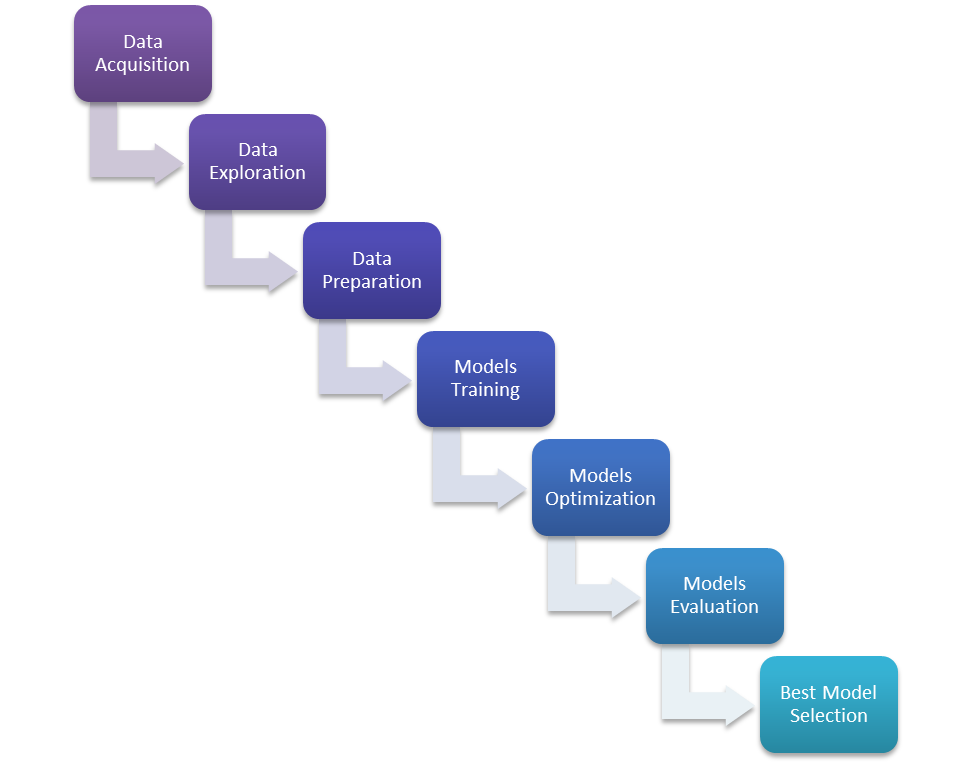
<p align="center"> Figure 1: Project Plan </p>

## 2. Understanding the case study

###  Case study analysis (8 marks)

Nowadays, in the banking and telemarketing domain, machine learning models play a crucial role in accessing clients’ profiles and predicting their prospective decisions. The case study of this project revolves around the same concept. Data accumulated from multiple phone marketing campaigns conducted by a Portuguese bank is planned to determine whether a client will avail the bank’s term deposit plan after participating in the bank’s phone marketing campaign. Undoubtedly, it is important for the bank to know the likelihood of a client subscribing to their term deposit plan to have long-term profits. Thus, this machine learning project can be quite useful to any bank that wants to predict the same.

#### Key Challenges

With the chosen dataset, it is a bit difficult to achieve accurate model predictions because of the following key challenges:

1.	The prediction is based on multiple variables related to the clients’ demographics like age, job details, marital status, education, and loan status, variables related to the bank’s discussion with the client during the marketing campaign like contact information, last contact details, and the number of previous contacts, and banking variables like employment variation rate, consumer price index, euribor 3 month rate, and consumer confidence index, respectively. As the data is multivariate, containing some real attributes and some categorical ones, preprocessing is a must before feeding the data to any machine learning model.

2.	Collecting all the information for every client is usually not feasible, so the missing data must be handled properly, either by imputation or deletion.

3.	Even the duplicate entries need to be cleaned to improve the training performance of the models.

4.	Moreover, understanding the statistics of the available data is critical before training any model, as it leads to uncovering the hidden patterns of the data and can throw light on other preprocessing steps required, such as outlier rejection, scaling, sampling, and discretization, to name a few. Deciding the appropriate pre-processing steps is sometimes very difficult and needs expertise.

5.	Not to forget, the statistic of a dataset obviously dictates the model choices, which is a difficult task to achieve.

6. Lastly, when the dataset is highly imbalanced, the chances of overfitting is very high.

#### Possible solutions

For our case study, because I am predicting if a client will subscribe to a term deposit plan, which is basically a binary classification scenario, choosing a suitable binary classifier is the most viable solution, and appropriate data preprocessing is required to handle the above-mentioned key challenges. Moreover, the selected classifiers need to be trained well and their hyperparameters must be tuned through cross-validation before testing them with completely unknown data. To conclude, the case study, in general, is quite rich and challenging, at the same time, and thus, building a classifier model for it, is surely going to be quite exciting.

## 3. Dataset description (8 marks)

The Bank Marketing dataset contains data related to phone marketing campaigns for term deposits conducted by a Portuguese bank. The dataset holds demographic information of the bank’s customers, phone calls made to them during the campaign, and other socioeconomic details, along with a target label that confirms if the customer subscribed to the term deposit plan. The dataset is obtained from [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Some of the key points observed in the datasets are as follows:

1. Two separate CSV data files are provided in the dataset. The first one is the **_bank-additional-full.csv_** file that will be utilized for training our models, and the second one is the **_bank-additional.csv_** file that will be used as test data to evaluate the models. In addition, a third metadata file is also provided, which gives more insight into the data.

2. The datasets have 20 feature columns and one target column. Feature columns are a mixture of numeric, floating, and categorical values. Eleven of the 20 feature columns contain strings, so they must be transformed into numerical values before feeding to the models. In addition, since the target column is categorical and has only two distinct values, ML models need to be trained for binary classification.

3. There are no null or empty values in the dataset. But as per the metadata file, an "_unknown_" value is used to represent the missing data in the dataset. Thus, all missing data points need to be handled separately.

4. Additionally, outliers found for numerical features i.e "_duration_", "_campaign_", "_pdays_" and "_cons.conf.idx_" as shown in **[Figure 2](#Figure_2)** need to be removed.

5. Features like "_age_", "_duration_", "_pdays_" and "_euribor3m_" contains widely varied values, and thus, it is essential to scale them to enhance the performance of the models.

6. Correlation matrix shown in the **[Table 1](#Table_1)** revealed that at least three features are correlated to each other. So, we need to perform feature selection on the dataset appropriately.

7. Few data points are duplicated in the training dataset, which can be seen in the **[Table 2](#Table_2)** and need to be removed.

8. Last but not least, the training dataset is heavily imbalanced and is inclined towards non-subscribers of the term deposit, as shown in **[Figure 4](#Figure_4)**. As in this project, the plan is to use a SVM model and a Neural Network model, and both the models accept imbalanced data, most probably there is no need of balancing the dataset by sampling.


#### Importing the python libraries

In [ ]:
import pandas as pd                 # Importing pandas for reading csv files and manipulating the data
import numpy as np                  # Importing numpy for mathematical operations
import matplotlib.pyplot as plt     # Importing matplotlib for plotting graphs
import seaborn as sns               # Importing seaborn for plotting complex graphs
from imblearn.over_sampling import RandomOverSampler    # Importing for oversampling the data

# Importing sklearn modules of classifiers, scalers and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import classification_report, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.svm import SVC            

# Importing tensorflow for neural network implementation
import tensorflow as tf
from tensorflow.keras import Sequential, layers, losses, metrics, optimizers, models

# Import joblib to save SVM models
import joblib as jl

#### Declaring the Constants

In [ ]:
MISSING_STRING = 'unknown'
TARGET_ATTRIBUTE = 'y'
TRAINING = 'training'
TESTING = 'testing'

# Global variable to store object of scaler class
GV_SCALER_OBJECT = StandardScaler(with_mean=False)      # with_mean is set to false to handle the sparse data appropriately.

# Global variable to store boolean true or false if training set is preprocessed
GV_TRAIN_DATA_PREPROCESSED = False

# Seeding random number generator
RANDOM_STATE = 3
np.random.seed(RANDOM_STATE)
tf.keras.utils.set_random_seed(RANDOM_STATE)

# SVM
SVM_CACHE_SIZE = 1000

### Loading the CSV files

This project uses two CSV files: _bank-additional-full.csv_ & _bank_addtional.csv_  which are loaded into two different Pandas dataframes. The former CSV contains training data and the latter contains testing data. Since in both the CSV files, data is delimited by semicolon(;), the same is explicitly added as delimiter while reading the CSV files.

In [ ]:
DF_BANK_TRAIN = pd.read_csv('bank-additional-full.csv', delimiter=';')
DF_BANK_TEST = pd.read_csv('bank-additional.csv', delimiter=';')

### Exploring the training dataset

In this section, the training dataset is explored and the key features found are presented below.

#### Detailed information of the dataset

In [ ]:
DF_BANK_TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Executing the above cell confirmed that the training dataset has 41188 data rows and 21 columns. The last column, 'y', stores the target labels. Moreover, it is observed that there is no null data in any of the columns.

#### First ten data points in the dataset


In [ ]:
DF_BANK_TRAIN.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The above cell displays the first 10 data rows in the dataframe. On closely examining the data, one can see the "unknown" values in the "education" and "default" attributes. As per the metadata file, these "unknown" values are nothing but missing values.

#### Statistics of numerical features

In [ ]:
DF_BANK_TRAIN.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


An interesting observation is made with the statistical data of the features "_pdays_" and "_previous_" and that is all the three quartiles of both the features have the same value. Per the metadata file, the value "999" in the feature "_pdays_" denotes no previous contact with the client whereas values in "_previous_" denotes number of times client was contacted before campaign. Thus, features "_pdays_" and "_previous_" don't carry much information.

#### Boxplots for outliers 

Boxplots are drawn below to check the outliers in the numerical features<a name='Figure_2'></a>.

In [ ]:
def plot_boxplots(dataframe, attributes, fig_num, figsize, nrows, ncols):
    """
    This function plots boxplot of attributes in dataframe 
    """
    fig, axs = plt.subplots(figsize=figsize, nrows = nrows,  ncols=ncols)
    col = 0
    row = 0

    for attribute in attributes:
        if nrows > 1:
            axs[row][col].boxplot(dataframe[attribute])
            axs[row][col].set_title("Feature: " + attribute)
        else:
            axs[:][col].boxplot(dataframe[attribute])
            axs[:][col].set_title("Feature: " + attribute)
        col += 1
        if col == ncols:
            row += 1
            col = 0

    fig.suptitle("Figure {num}: Boxplots to check outliers in the numerical features".format(num=fig_num), fontsize=15, y=0)
    fig.tight_layout()

    return fig, axs

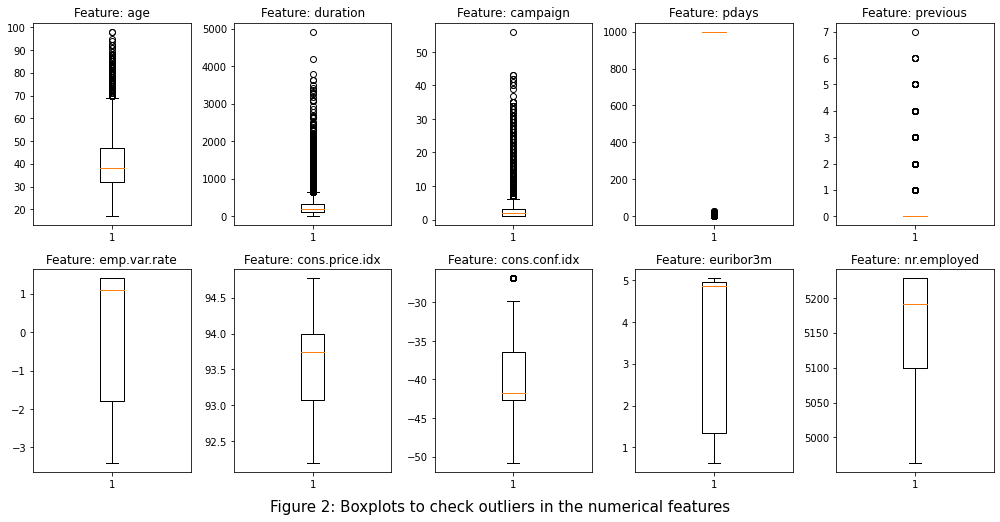

In [ ]:
figure_2, _ = plot_boxplots(DF_BANK_TRAIN, DF_BANK_TRAIN.describe().columns, 2, (14, 7), 2, 5)
figure_2.show()

Above boxplots show that there are multiple outliers in "**_age_**", "**_duration_"**, "**_campaign_**" and "**_cons.conf.idx_**" features, apart from "**_pdays**" and "**previous**" features.

In [ ]:
DF_BANK_TRAIN[['previous', 'y']].value_counts()

previous  y  
0         no     32422
1         no      3594
0         yes     3141
1         yes      967
2         no       404
          yes      350
3         yes      128
          no        88
4         yes       38
          no        32
5         yes       13
          no         5
6         yes        3
          no         2
7         no         1
dtype: int64

#### Correlation matrix of numerical features

A correlation matrix is presented below to identify the correlation between various numerical fetaures<a Name='Table_1'></a>.

In [ ]:
table_1 = DF_BANK_TRAIN.corr()
table_1.style.format(precision=4, na_rep=MISSING_STRING).background_gradient()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0000,-0.0009,0.0046,-0.0344,0.0244,-0.0004,0.0009,0.1294,0.0108,-0.0177
duration,-0.0009,1.0000,-0.0717,-0.0476,0.0206,-0.0280,0.0053,-0.0082,-0.0329,-0.0447
campaign,0.0046,-0.0717,1.0000,0.0526,-0.0791,0.1508,0.1278,-0.0137,0.1351,0.1441
pdays,-0.0344,-0.0476,0.0526,1.0000,-0.5875,0.2710,0.0789,-0.0913,0.2969,0.3726
previous,0.0244,0.0206,-0.0791,-0.5875,1.0000,-0.4205,-0.2031,-0.0509,-0.4545,-0.5013
emp.var.rate,-0.0004,-0.0280,0.1508,0.2710,-0.4205,1.0000,0.7753,0.1960,0.9722,0.9070
cons.price.idx,0.0009,0.0053,0.1278,0.0789,-0.2031,0.7753,1.0000,0.0590,0.6882,0.5220
cons.conf.idx,0.1294,-0.0082,-0.0137,-0.0913,-0.0509,0.1960,0.0590,1.0000,0.2777,0.1005
euribor3m,0.0108,-0.0329,0.1351,0.2969,-0.4545,0.9722,0.6882,0.2777,1.0000,0.9452
nr.employed,-0.0177,-0.0447,0.1441,0.3726,-0.5013,0.9070,0.5220,0.1005,0.9452,1.0000


It is noted that the features "**_emp.var.rate_**", "**_euribor3m_**" & "**_nr.employed_**" are tightly correlated to each other as shown in the table_1 above.

#### Unique value count of features

For all the features, number of unique values are printed below.

In [ ]:
DF_BANK_TRAIN.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

The feature "**duration**" has maximum number of unique values whereas "**contact**" has only two values.

#### Piecharts of categorical features

Piecharts showing percentage of unique values in each of the categorical features<a name='Figure_3'></a> are presented below.

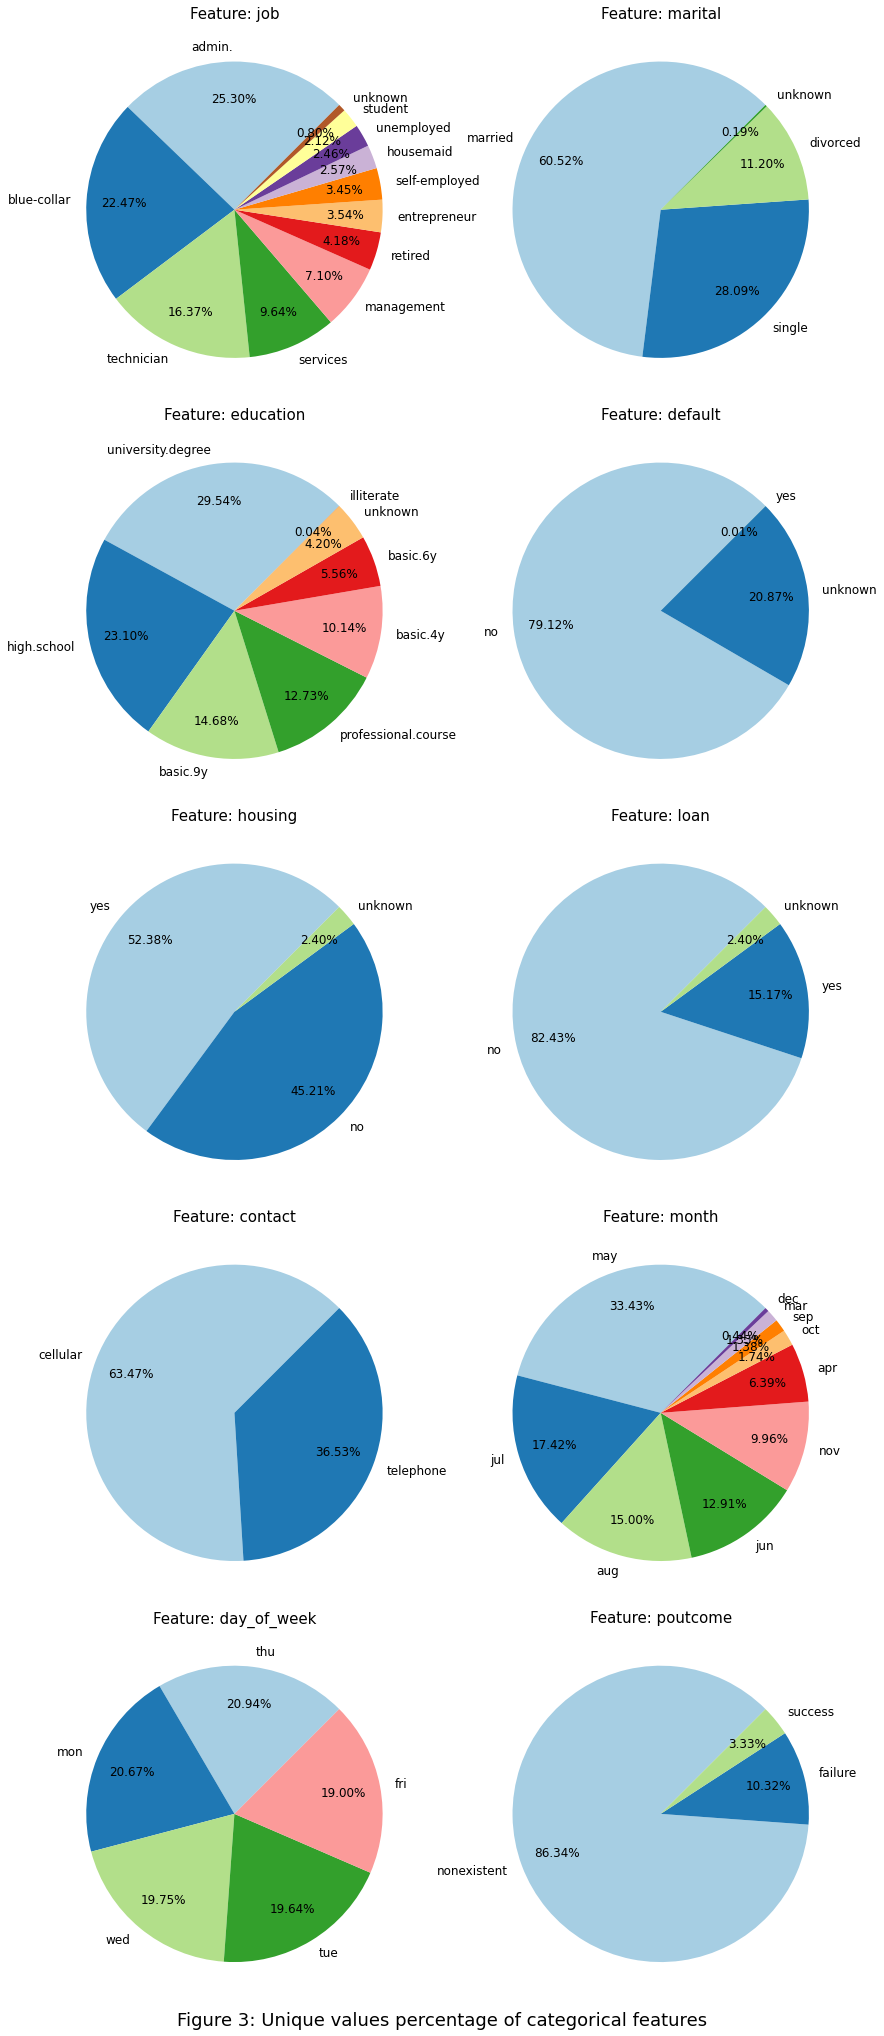

In [ ]:
figure_3, axs = plt.subplots(figsize=(12, 28), nrows = 5,  ncols=2)
col = 0
row = 0

for column in DF_BANK_TRAIN.select_dtypes(include=['object']).columns:
    if column is TARGET_ATTRIBUTE:
        continue
    
    col_value_count = DF_BANK_TRAIN[column].value_counts()
    
    axs[row][col].pie(col_value_count,
                      labels = col_value_count.index,
                      autopct = '%.2f%%',
                      pctdistance = 0.75,
                      colors = plt.cm.Paired.colors,
                      textprops = {'size': 'large'},
                      startangle = 45)

    axs[row][col].set_title("Feature: " + column, fontsize=15)
    
    col += 1
    if col == 2:
        row += 1
        col = 0

figure_3.suptitle("Figure 3: Unique values percentage of categorical features", y=0, fontsize=18)
figure_3.tight_layout()
figure_3.show()

From the above piecharts, it can be observed that the feature vector "**_default_**" has 79.12% "_no_" values, 20.87% missing values ("_unknown_") and only 0.01% of "_yes_" values. If we remove all the missing values from the dataset, the models will overfit during training because one category outnumbers another. So, to avoid model overfitting, feature vector "**_default_**" will be dropped from the dataset.

#### Piechart of target feature 

Piechart below shows the percentage of clients subscribed to the term deposits during the phone banking campaign<a name='Figure_4'></a>.

no     36548
yes     4640
Name: y, dtype: int64


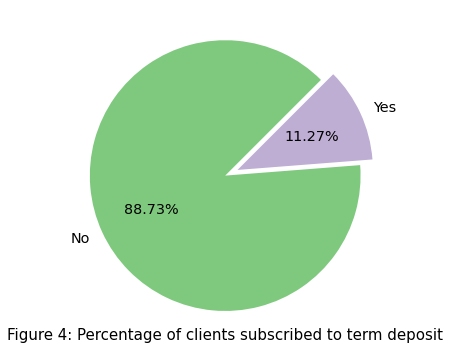

In [ ]:
figure_4, axs = plt.subplots(figsize = (8,5))

client_subscribed_count = DF_BANK_TRAIN['y'].value_counts()

print(client_subscribed_count)

axs.pie(client_subscribed_count,
        labels = client_subscribed_count.index.str.title(),             # Converting index of client_subscribed_count to titlecase.
        explode = [0, 0.1],
        autopct = '%.2f%%',
        colors = plt.cm.Accent.colors,
        textprops = {'size': 'x-large'},
        startangle = 45)

axs.set_title("Figure 4: Percentage of clients subscribed to term deposit", y=0, fontsize=15)

figure_4.tight_layout()
figure_4.show()

The piechart above confirms that the dataset is imbalanced as the target feature contains 88.73% "**no**" values and 11.27% "**yes**" values, respectively.

#### Duplicates in the training dataset<a Name='Table_2'></a>

In [ ]:
table_2 = DF_BANK_TRAIN[DF_BANK_TRAIN.duplicated(keep=False) == True]
table_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Above cell shows that there are 24 duplicated data rows in the training dataset. They will be removed during the preprocessing steps.

### Peeking into the testing dataset

In [ ]:
DF_BANK_TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

The testing dataset contains 4119 datapoints and don't have any null entries. The cell below shows the first ten datapoints of the testing dataset.

In [ ]:
DF_BANK_TEST.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### Data Preprocessing

In this section, the dataset passes through many preprocessing steps, and gets enriched before fed to the models for model training.

#### Handling the missing values

The missing values are replaced with numpy NaN in the training dataset.

In [ ]:
def replace_missing_value_with_nan(dataframe):
    """
    This function returns a new dataframe after converting missing value into
    numpy NaN.
    """
    print("Replacing missing values with nan in the dataset")
    return dataframe.replace(MISSING_STRING, np.nan)

In [ ]:
DF_BANK_TRAIN_NAN = replace_missing_value_with_nan(DF_BANK_TRAIN)
DF_BANK_TRAIN_NAN.info()

Replacing missing values with nan in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-n

All the data points with missing values are dropped.

In [ ]:
def drop_missing_value_data_points(dataframe):
    """
    This function returns a new dataframe after dropping data rows with missing values.
    """
    print("Dropping all the data points with missing values")
    return replace_missing_value_with_nan(dataframe).dropna()

In [ ]:
DF_BANK_TRAIN_NO_MISSING_VAL = drop_missing_value_data_points(DF_BANK_TRAIN)
DF_BANK_TRAIN_NO_MISSING_VAL.info()

Dropping all the data points with missing values
Replacing missing values with nan in the dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 n

#### Handling the duplicates

The duplicate data points are removed from the dataset.

In [ ]:
def drop_duplicate_data(dataframe):
    """
    This function returns a new dataframe after dropping all the duplicated data.
    """
    duplicate_count = dataframe.duplicated().sum()
    print("Dropping {count} duplicated data from the dataset".format(count=duplicate_count))
    return dataframe.drop_duplicates(ignore_index=True)

In [ ]:
print(DF_BANK_TRAIN_NO_MISSING_VAL.shape)
DF_BANK_TRAIN_NO_DUP = drop_duplicate_data(DF_BANK_TRAIN_NO_MISSING_VAL)
print(DF_BANK_TRAIN_NO_DUP.shape)

(30488, 21)
Dropping 10 duplicated data from the dataset
(30478, 21)


#### Converting target into binary


As target feature "**_y_**" has two string values _no_ and _yes_, we need to convert it into binary values.  

i.e. 

|Value|Binary|
|:--:|:--:|
|no|0|
|yes|1|

In [ ]:
DF_BANK_TRAIN_NO_DUP['y'].value_counts()

no     26620
yes     3858
Name: y, dtype: int64

In [ ]:
def binarize_attribute(dataframe, attribute, binary_dict=None):                      
    """
    This function will convert categorical attribute into binary values
    """
    print("Converting categorical attribute {attribute} into binary".format(attribute=attribute))
    df_copy = dataframe.copy(deep=True)
    
    if binary_dict is None:
        uniq_values = df_copy[attribute].unique()
        binary_dict = {uniq_values[0]:0,
                       uniq_values[1]:1}
    
    df_copy[attribute].replace(binary_dict, inplace=True)
    return df_copy

In [ ]:
DF_BANK_TRAIN_BINARY_LABEL = binarize_attribute(DF_BANK_TRAIN_NO_DUP, TARGET_ATTRIBUTE, {'no':0, 'yes':1})
DF_BANK_TRAIN_BINARY_LABEL[TARGET_ATTRIBUTE].value_counts()

Converting categorical attribute y into binary


0    26620
1     3858
Name: y, dtype: int64

#### Feature selections

1. Statistics of feature "_pdays_" and "_previous_" showed us that it has same value in all three quantiles.

In [ ]:
DF_BANK_TRAIN_BINARY_LABEL[['pdays', 'previous']].describe()

,pdays,previous
count,30478.000000,30478.000000
mean,956.318295,0.194337
std,201.404843,0.522862
min,0.000000,0.000000
25%,999.000000,0.000000
50%,999.000000,0.000000
75%,999.000000,0.000000
max,999.000000,7.000000


In [ ]:
DF_BANK_TRAIN_BINARY_LABEL['pdays'].value_counts()

999    29168
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [ ]:
DF_BANK_TRAIN_BINARY_LABEL['previous'].value_counts()

0    25826
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64

> The value counts of both the features show that more than 80% of data is inclined towards a value which gives no crucial information about the features. So, these features are dropped as they will not add any value to the training of the models.

2. From **[Table 1](#Table_1)**, we found that features such as "_emp.var.rate_", "_euribor3m_" and "_nr.employed_" are strongly correlated to each other.

In [ ]:
corr_matrix = DF_BANK_TRAIN_BINARY_LABEL[['emp.var.rate', 'euribor3m', 'nr.employed', 'y']].corr()
corr_matrix.style.format(precision=4).background_gradient()

,emp.var.rate,euribor3m,nr.employed,y
emp.var.rate,1.0000,0.9694,0.9004,-0.3053
euribor3m,0.9694,1.0000,0.9449,-0.3158
nr.employed,0.9004,0.9449,1.0000,-0.3642
y,-0.3053,-0.3158,-0.3642,1.0000


> We can see from the output of the above cell that "_euribor3m_" has more than 94% similarity with "_emp.var.rate_" and "_nr.employed_". In addition, "_euribor3m_"  has a negative correlation of 31% with the target, which is in between the correlation vallues of the other two features with the target. 
>
> Having said that, we can keep "_euribor3m_"  and drop features "_emp.var.rate_" and "_nr.employed_" from the dataset as they will have no value addition while training the models and increase computation time.


3. Last but not least, we found in **[Figure 3](#Figure_3)** piecharts, the "_default_" feature has disproportionately large _no_ values than _yes_ in the dataset. We need to drop the "_default_" features from the dataset as it may cause overfitting of our models while training.

In [ ]:
DF_BANK_TRAIN_BINARY_LABEL['default'].value_counts()

no     30475
yes        3
Name: default, dtype: int64

Creating a list of attributes to be dropped from the dataset as the same attributes needs to be dropped in test dataset.

In [ ]:
DROP_ATTRIBUTES = ['pdays', 'previous', 'emp.var.rate', 'nr.employed', 'default']

In [ ]:
def drop_attributes(dataframe, attrib_list):
    """
    This function drops the attributes in dataframe
    """
    print("Dropping attributes in the list: {attrib_list} from dataframe".format(attrib_list = attrib_list))
    df_copy = dataframe.copy(deep=True)
    df_copy.drop(columns=attrib_list, inplace=True)
    return df_copy

In [ ]:
DF_BANK_TRAIN_DROPPED_ATTRIB = drop_attributes(DF_BANK_TRAIN_BINARY_LABEL, DROP_ATTRIBUTES)
DF_BANK_TRAIN_DROPPED_ATTRIB.info()

Dropping attributes in the list: ['pdays', 'previous', 'emp.var.rate', 'nr.employed', 'default'] from dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   housing         30478 non-null  object 
 5   loan            30478 non-null  object 
 6   contact         30478 non-null  object 
 7   month           30478 non-null  object 
 8   day_of_week     30478 non-null  object 
 9   duration        30478 non-null  int64  
 10  campaign        30478 non-null  int64  
 11  poutcome        30478 non-null  object 
 12  cons.price.idx  30478 non-null  float64
 13  cons.conf.idx   30478 non-null  float64
 14  euribor3m       30478 non-null  float64
 15  y        

In [ ]:
corr_matrix = DF_BANK_TRAIN_DROPPED_ATTRIB.corr()
corr_matrix.style.format(precision=4).background_gradient()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,y
age,1.0000,0.0080,-0.0023,-0.0356,0.1247,-0.0364,0.0487
duration,0.0080,1.0000,-0.0685,0.0128,-0.0095,-0.0289,0.3936
campaign,-0.0023,-0.0685,1.0000,0.1272,-0.0116,0.1409,-0.0692
cons.price.idx,-0.0356,0.0128,0.1272,1.0000,0.0274,0.6672,-0.1287
cons.conf.idx,0.1247,-0.0095,-0.0116,0.0274,1.0000,0.2438,0.0615
euribor3m,-0.0364,-0.0289,0.1409,0.6672,0.2438,1.0000,-0.3158
y,0.0487,0.3936,-0.0692,-0.1287,0.0615,-0.3158,1.0000


#### Handling the outliers

Since outliers are detected in the "_age_", "_duration_", "_campaign_" and "_cons.conf.idx_" features. These outliers can be removed using the interquartile range(IQR) of the corresponding feature vectors.

In [ ]:
OUTLIERS_ATTRIBUTES = ['age', 'duration', 'campaign', 'cons.conf.idx']

In [ ]:
def get_iqr_upper_n_lower_limit(arr):
    """
    This function returns upper and lower limit using IQR.
    """
    # Get 1st quartile of an array
    q1 = np.quantile(arr, 0.25)

    # Get 3rd quartile of an array
    q3 = np.quantile(arr, 0.75)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower limit
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    return upper_limit, lower_limit

In [ ]:
def fixing_attributes_outliers(dataframe, attrib_list):
    """
    This function fixes outlier by replacing it with either upper limit or
    lower limit.
    """
    print("After removing the outliers in the dataframe's attributes")
    df_copy = dataframe.copy(deep=True)

    for attribute in attrib_list:
        upper_limit, lower_limit = get_iqr_upper_n_lower_limit(df_copy[attribute])
        
        # Check and update the data if it is less than lower limit
        df_copy[attribute].where(lower_limit <= df_copy[attribute], lower_limit, inplace=True)

        # Check and update the data if it is greater than upper limit
        df_copy[attribute].where(upper_limit >= df_copy[attribute], upper_limit, inplace=True)

    return df_copy

In [ ]:
DF_BANK_TRAIN_DROPPED_ATTRIB[OUTLIERS_ATTRIBUTES].describe()

,age,duration,campaign,cons.conf.idx
count,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,-40.602579
std,10.332746,261.746393,2.720495,4.788790
min,17.000000,0.000000,1.000000,-50.800000
25%,31.000000,103.000000,1.000000,-42.700000
50%,37.000000,181.000000,2.000000,-41.800000
75%,45.000000,321.000000,3.000000,-36.400000
max,95.000000,4918.000000,43.000000,-26.900000


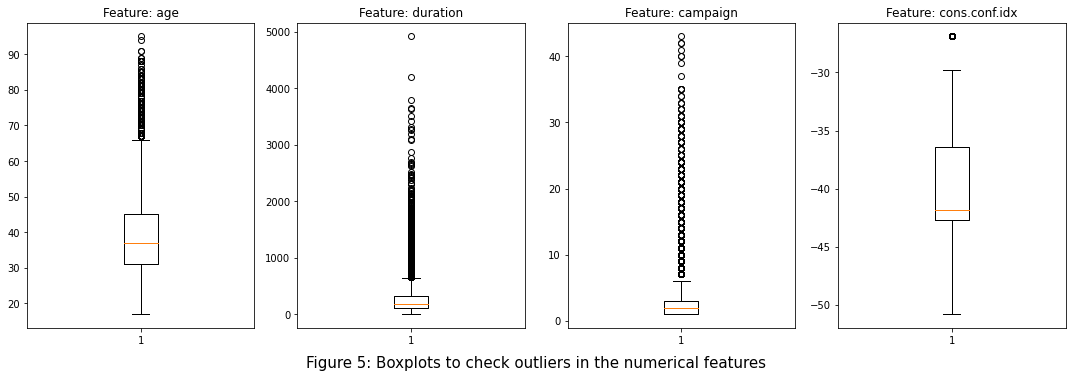

In [ ]:
#Before removing the outliers
fig,_ = plot_boxplots(DF_BANK_TRAIN_DROPPED_ATTRIB, OUTLIERS_ATTRIBUTES, 5, (15, 5), 1, 4)
fig.show()

After removing the outliers in the dataframe's attributes


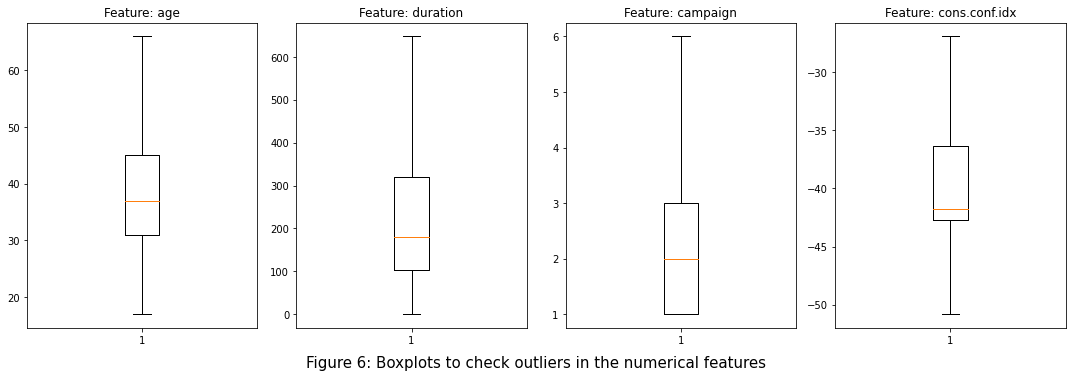

In [ ]:
#After removing outliers
DF_BANK_TRAIN_NO_OUTLIERS = fixing_attributes_outliers(DF_BANK_TRAIN_DROPPED_ATTRIB, OUTLIERS_ATTRIBUTES)
fig,_ = plot_boxplots(DF_BANK_TRAIN_NO_OUTLIERS, OUTLIERS_ATTRIBUTES, 6, (15, 5), 1, 4)
fig.show()

#### Rescale/Standardization

In [ ]:
DF_BANK_TRAIN_NO_OUTLIERS.describe()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,y
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,38.894055,236.072938,2.245685,93.523376,-40.603227,3.459976,0.126583
std,9.882887,177.976136,1.530479,0.585366,4.786939,1.777215,0.332511
min,17.000000,0.000000,1.000000,92.201000,-50.800000,0.634000,0.000000
25%,31.000000,103.000000,1.000000,93.075000,-42.700000,1.313000,0.000000
50%,37.000000,181.000000,2.000000,93.444000,-41.800000,4.856000,0.000000
75%,45.000000,321.000000,3.000000,93.994000,-36.400000,4.961000,0.000000
max,66.000000,648.000000,6.000000,94.767000,-26.950000,5.045000,1.000000


In [ ]:
RESCALE_ATTRIBUTES = ['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [ ]:
def rescale_attributes(dataframe, attrib_list, mode=TRAINING):
    """
    This function returns dataframe after rescaling continuous data attributes. If mode = 'training', then
    scaler object will be trained on the data of the attributes
    """
    print("Rescaling attributes in dataframe")

    global GV_SCALER_OBJECT

    df_copy = dataframe.copy(deep=True)

    if mode is TRAINING:
        # Compute mean and std for attributes in the dataframe using scaling class object
        GV_SCALER_OBJECT.fit(df_copy[attrib_list].to_numpy())

    # Rescale the data in attributes and generate a pandas dataframe
    df_copy[attrib_list] = pd.DataFrame(GV_SCALER_OBJECT.transform(df_copy[attrib_list].to_numpy()),
                                                columns=attrib_list)

    return df_copy

In [ ]:
DF_BANK_TRAIN_RESCALED = rescale_attributes(DF_BANK_TRAIN_NO_OUTLIERS, RESCALE_ATTRIBUTES, TRAINING)
DF_BANK_TRAIN_RESCALED.describe()

Rescaling attributes in dataframe


,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,y
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,3.935560,1.326452,1.467333,159.771560,-8.482225,1.946885,0.126583
std,1.000016,1.000016,1.000016,1.000016,1.000016,1.000016,0.332511
min,1.720173,0.000000,0.653401,157.512467,-10.612384,0.356744,0.000000
25%,3.136787,0.578739,0.653401,159.005573,-8.920252,0.738809,0.000000
50%,3.743907,1.017007,1.306802,159.635958,-8.732237,2.732410,0.000000
75%,4.553400,1.803642,1.960203,160.575556,-7.604149,2.791492,0.000000
max,6.678320,3.640997,3.920405,161.896118,-5.629995,2.838758,1.000000


#### Encoding categorical features into numeric

1. After removing missing values and duplicates from the dataset, features like _default_, _housing_, _loan_ and _contact_ have two unique values. Since _default_ feature has already been dropped during feature selection, remaining features must be converted into binary values.

In [ ]:
DF_BANK_TRAIN_RESCALED[['housing', 'loan', 'contact']].nunique()

housing    2
loan       2
contact    2
dtype: int64

In [ ]:
DF_BANK_TRAIN_RESCALED['housing'].value_counts()

yes    16516
no     13962
Name: housing, dtype: int64

In [ ]:
def encoding_binary_categorical_attribs(dataframe):
    """
    This function converts values of categorical attributes in dataframe into binary values
    """
    df_copy = dataframe.copy(deep=True)
    attrib_nunique = df_copy.nunique()
    for attribute in attrib_nunique.index:
        if attrib_nunique[attribute] == 2 and attribute is not TARGET_ATTRIBUTE:
                df_copy = binarize_attribute(df_copy, attribute)
    return df_copy

In [ ]:
DF_BANK_TRAIN_BINARY_ATTRIB = encoding_binary_categorical_attribs(DF_BANK_TRAIN_DROPPED_ATTRIB)
DF_BANK_TRAIN_BINARY_ATTRIB['housing'].value_counts()

Converting categorical attribute housing into binary
Converting categorical attribute loan into binary
Converting categorical attribute contact into binary


1    16516
0    13962
Name: housing, dtype: int64

2. Features like "_month_" and "_day_of_week_" are sequential categories required to be converted into numeric representation of months and days in week.

In [ ]:
DF_BANK_TRAIN_BINARY_ATTRIB['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
DF_BANK_TRAIN_BINARY_ATTRIB['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
SEQUENTIAL_ATTRIBUTES = {
    'month':{
        'jan':1,
        'feb':2,
        'mar':3,
        'apr':4,
        'may':5,
        'jun':6,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec':12,
    }, 
    'day_of_week':{
        'mon':1,
        'tue':2,
        'wed':3,
        'thu':4,
        'fri':5,
        'sat':6,
        'sun':7
    }
}

In [ ]:
def encoding_seq_categorical_attribs(dataframe, attribs_encoder_dict):
    """
    This function replace values in categorical attributes of dataframe into numeric using encoder dictionary.
    """
    print("Encoding categorical attributes {attribs} into numeric".format(attribs=list(attribs_encoder_dict.keys())))
    df_copy = dataframe.copy(deep=True)
    for attribute in attribs_encoder_dict.keys():
        df_copy[attribute].replace(attribs_encoder_dict[attribute], inplace=True)
    return df_copy

In [ ]:
DF_BANK_TRAIN_SEQ_ATTRIB = encoding_seq_categorical_attribs(DF_BANK_TRAIN_BINARY_ATTRIB, SEQUENTIAL_ATTRIBUTES)
DF_BANK_TRAIN_SEQ_ATTRIB

Encoding categorical attributes ['month', 'day_of_week'] into numeric


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,0,0,0,5,1,261,1,nonexistent,93.994,-36.4,4.857,0
1,37,services,married,high.school,1,0,0,5,1,226,1,nonexistent,93.994,-36.4,4.857,0
2,40,admin.,married,basic.6y,0,0,0,5,1,151,1,nonexistent,93.994,-36.4,4.857,0
3,56,services,married,high.school,0,1,0,5,1,307,1,nonexistent,93.994,-36.4,4.857,0
4,59,admin.,married,professional.course,0,0,0,5,1,139,1,nonexistent,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,73,retired,married,professional.course,1,0,1,11,5,334,1,nonexistent,94.767,-50.8,1.028,1
30474,46,blue-collar,married,professional.course,0,0,1,11,5,383,1,nonexistent,94.767,-50.8,1.028,0
30475,56,retired,married,university.degree,1,0,1,11,5,189,2,nonexistent,94.767,-50.8,1.028,0
30476,44,technician,married,professional.course,0,0,1,11,5,442,1,nonexistent,94.767,-50.8,1.028,1


3. Some of the categorical features such as "_job_", "_marital_", "_education_" and "_poutcome_" are multi-valued but not sequential. These features are required to be converted into numeric using One-hot encoding process.

In [ ]:
ONEHOTENCODE_CATG_ATTRIBS = ['job', 'marital', 'education', 'poutcome']

In [ ]:
def onehotencode_categorical_attribs(dataframe, attrib_list):
    """
    This functions returns new dataframe with one-hot encoded values of categorical attributes
    """
    print("One-hot encoding the categorical attributes {attribs} in the dateframe".format(attribs = attrib_list))
    return pd.get_dummies(dataframe, columns=attrib_list, dtype=int)

In [ ]:
DF_BANK_TRAIN_ONEHOT_ENCODE = onehotencode_categorical_attribs(DF_BANK_TRAIN_SEQ_ATTRIB, ONEHOTENCODE_CATG_ATTRIBS)
DF_BANK_TRAIN_ONEHOT_ENCODE.info()

One-hot encoding the categorical attributes ['job', 'marital', 'education', 'poutcome'] in the dateframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30478 non-null  int64  
 1   housing                        30478 non-null  int64  
 2   loan                           30478 non-null  int64  
 3   contact                        30478 non-null  int64  
 4   month                          30478 non-null  int64  
 5   day_of_week                    30478 non-null  int64  
 6   duration                       30478 non-null  int64  
 7   campaign                       30478 non-null  int64  
 8   cons.price.idx                 30478 non-null  float64
 9   cons.conf.idx                  30478 non-null  float64
 10  euribor3m                      30478 non-null  float64
 11  y

Encapsulating function calls for encoding all the categorical features

In [ ]:
def encoding_df_categorical_attributes(dataframe):
    """
    This function encodes all the categorical attributes in the dataframe
    """
    dataframe = binarize_attribute(dataframe, TARGET_ATTRIBUTE, {'no':0, 'yes':1})
    dataframe = encoding_binary_categorical_attribs(dataframe)
    dataframe = encoding_seq_categorical_attribs(dataframe, SEQUENTIAL_ATTRIBUTES)
    dataframe = onehotencode_categorical_attribs(dataframe, ONEHOTENCODE_CATG_ATTRIBS)
    return dataframe

#### Splitting features and target in dataframe

In [ ]:
def get_df_features_n_target_array(dataframe, target_attrib):
    """
    This function split the dataframe into two separate numpy array for features and target.
    """
    print("Splitting the dataframe into a features and a target numpy array")
    target_df = dataframe[target_attrib]
    features_df = dataframe.drop(columns=[target_attrib])
    return features_df.to_numpy(), target_df.to_numpy()

The above function is used later to extract the input data and target feature of the dataset. 

#### Sampling to handle data imbalance

As we have seen in **[Figure 4](!Figure_4)** for the original training dataset, only 11% of data are classified as _yes_. Thus, we need to oversample the data in _yes_ class to prevent our models from overfitting the data in _no_ class.

In [ ]:
DF_BANK_TRAIN_ONEHOT_ENCODE[TARGET_ATTRIBUTE].value_counts()

0    26620
1     3858
Name: y, dtype: int64

In [ ]:
def oversample_minority_target_class(dataframe, target_attrib):
    """
    This function oversampled the data of minority class of target attribute and returns sampled data in features and target array
    """
    print("Oversampling the data in the minor class of target attribute")
    X, y = get_df_features_n_target_array(dataframe, target_attrib)
    oversampler = RandomOverSampler(sampling_strategy='minority', random_state=RANDOM_STATE)
    resampled_X, resampled_y = oversampler.fit_resample(X, y)
    return resampled_X, resampled_y

In [ ]:
X, y = oversample_minority_target_class(DF_BANK_TRAIN_ONEHOT_ENCODE, TARGET_ATTRIBUTE)

print(X.shape, y.shape)
print(y.sum())              # This shows number of 1's in the target which should be equal to number of 0's

Oversampling the data in the minor class of target attribute
Splitting the dataframe into a features and a target numpy array
(53240, 35) (53240,)
26620


#### Pipelining the preprocessing steps

In [ ]:
def preprocess_dataframe(dataframe, mode=TRAINING, sample_train_data=False):
    """
    This function returns dataframe after preprocessing it through 
    various preprocessing functions.
    """
    print("Preprocessing the {mode} dataframe".format(mode=mode))

    global GV_TRAIN_DATA_PREPROCESSED

    if mode is TRAINING:
        GV_TRAIN_DATA_PREPROCESSED = True
    elif not GV_TRAIN_DATA_PREPROCESSED:
        print("Cannot perform pre-processing of the test dataset before pre-processing of the training dataset!")
        return dataframe

    preprocessed_df = drop_missing_value_data_points(dataframe)
    
    preprocessed_df = drop_duplicate_data(preprocessed_df)

    preprocessed_df = drop_attributes(preprocessed_df, DROP_ATTRIBUTES)

    # Fixing the outliers in the training dataset
    if mode is TRAINING:
        preprocessed_df = fixing_attributes_outliers(preprocessed_df, OUTLIERS_ATTRIBUTES)

    preprocessed_df = rescale_attributes(preprocessed_df, RESCALE_ATTRIBUTES, mode)

    preprocessed_df = encoding_df_categorical_attributes(preprocessed_df)

    # Samping only training dataset iff sample_train_data is true and return numpy arrays for features and target
    if sample_train_data and mode is TRAINING:
        X, y = oversample_minority_target_class(preprocessed_df, TARGET_ATTRIBUTE)
    else:
        # Split the dataset into numpy arrays for features and target
        X, y = get_df_features_n_target_array(preprocessed_df, TARGET_ATTRIBUTE)

    print("Data preprocessed successfully")
    return X, y 

In [ ]:
print("Training dataset shape: {training_shape}\nTesting dataset shape: {testing_shape}".format(training_shape=DF_BANK_TRAIN.shape, 
                                                                                                testing_shape=DF_BANK_TEST.shape))

Training dataset shape: (41188, 21)
Testing dataset shape: (4119, 21)


Preprocessing the training dataset without sampling

In [ ]:
X_train, y_train = preprocess_dataframe(DF_BANK_TRAIN, mode=TRAINING)

Preprocessing the training dataframe
Dropping all the data points with missing values
Replacing missing values with nan in the dataset
Dropping 10 duplicated data from the dataset
Dropping attributes in the list: ['pdays', 'previous', 'emp.var.rate', 'nr.employed', 'default'] from dataframe
After removing the outliers in the dataframe's attributes
Rescaling attributes in dataframe
Converting categorical attribute y into binary
Converting categorical attribute housing into binary
Converting categorical attribute loan into binary
Converting categorical attribute contact into binary
Encoding categorical attributes ['month', 'day_of_week'] into numeric
One-hot encoding the categorical attributes ['job', 'marital', 'education', 'poutcome'] in the dateframe
Splitting the dataframe into a features and a target numpy array
Data preprocessed successfully


Preprocessing the training dataset with sampling

In [ ]:
X_sampled_train, y_sampled_train = preprocess_dataframe(DF_BANK_TRAIN, mode=TRAINING, sample_train_data=True)

Preprocessing the training dataframe
Dropping all the data points with missing values
Replacing missing values with nan in the dataset
Dropping 10 duplicated data from the dataset
Dropping attributes in the list: ['pdays', 'previous', 'emp.var.rate', 'nr.employed', 'default'] from dataframe
After removing the outliers in the dataframe's attributes
Rescaling attributes in dataframe
Converting categorical attribute y into binary
Converting categorical attribute housing into binary
Converting categorical attribute loan into binary
Converting categorical attribute contact into binary
Encoding categorical attributes ['month', 'day_of_week'] into numeric
One-hot encoding the categorical attributes ['job', 'marital', 'education', 'poutcome'] in the dateframe
Oversampling the data in the minor class of target attribute
Splitting the dataframe into a features and a target numpy array
Data preprocessed successfully


Preprocessing the testing dataset

In [ ]:
X_test, y_test = preprocess_dataframe(DF_BANK_TEST, mode=TESTING)

Preprocessing the testing dataframe
Dropping all the data points with missing values
Replacing missing values with nan in the dataset
Dropping 0 duplicated data from the dataset
Dropping attributes in the list: ['pdays', 'previous', 'emp.var.rate', 'nr.employed', 'default'] from dataframe
Rescaling attributes in dataframe
Converting categorical attribute y into binary
Converting categorical attribute housing into binary
Converting categorical attribute loan into binary
Converting categorical attribute contact into binary
Encoding categorical attributes ['month', 'day_of_week'] into numeric
One-hot encoding the categorical attributes ['job', 'marital', 'education', 'poutcome'] in the dateframe
Splitting the dataframe into a features and a target numpy array
Data preprocessed successfully


In [ ]:
print(X_train.shape, y_train.shape)

(30478, 35) (30478,)


In [ ]:
print(X_sampled_train.shape, y_sampled_train.shape)

(53240, 35) (53240,)


In [ ]:
print(X_test.shape, y_test.shape)

(3090, 35) (3090,)


Splitting training dataset into training and validation for both unsampled and sampled data.

Since X_train has approximately 30000 data points, it can be splitted into 80% training and 20% validation dataset. Whereas X_sampled_train has approximately 53000 data points, it can be splitted into 90% training and 10% validation dataset.

In [ ]:
X_split_train, X_split_val, y_split_train, y_split_val = train_test_split(X_train,
                                                                          y_train,
                                                                          test_size=0.20,   # 20% validation data
                                                                          random_state=RANDOM_STATE)

In [ ]:
X_sampled_split_train, X_sampled_split_val, y_sampled_split_train, y_sampled_split_val = train_test_split(X_sampled_train,
                                                                                                          y_sampled_train,
                                                                                                          test_size=0.10, # 10% validation data
                                                                                                          random_state=RANDOM_STATE)

Note: As SVM and Neural Network models can do well even with an unbalanced dataset, in this project, this theory is investigated. Thus, the strategy followed here is hyperparameters tuning of the models with the unbalanced dataset during the training and validation phase and performance analysis of the models on both the unbalanced dataset and the balanced dataset obtained after sampling.

## 4. Technique 1 - Support Vector Machine

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)

100-200 words


The first model of choice is Support Vector Machine(SVM) and the main reasons behing chosing SVM are as follows:

1. To analyse the performances of linear and non-linear kernels on our dataset. (Model flexibility)
2. To investigate the SVM model performance on unbalanced dataset with bias and outliers. (Robustness)
3. To confirm the speed and efficiency of the SVM algorithm for our huge dataset containing nearly 30000 datapoints. (Faster and Memory Efficient)
4. To explore how well model gets trained with the multi-variate data. (Effective in high dimensions)

The schematic figure of the SVM model training and testing process is shown below:

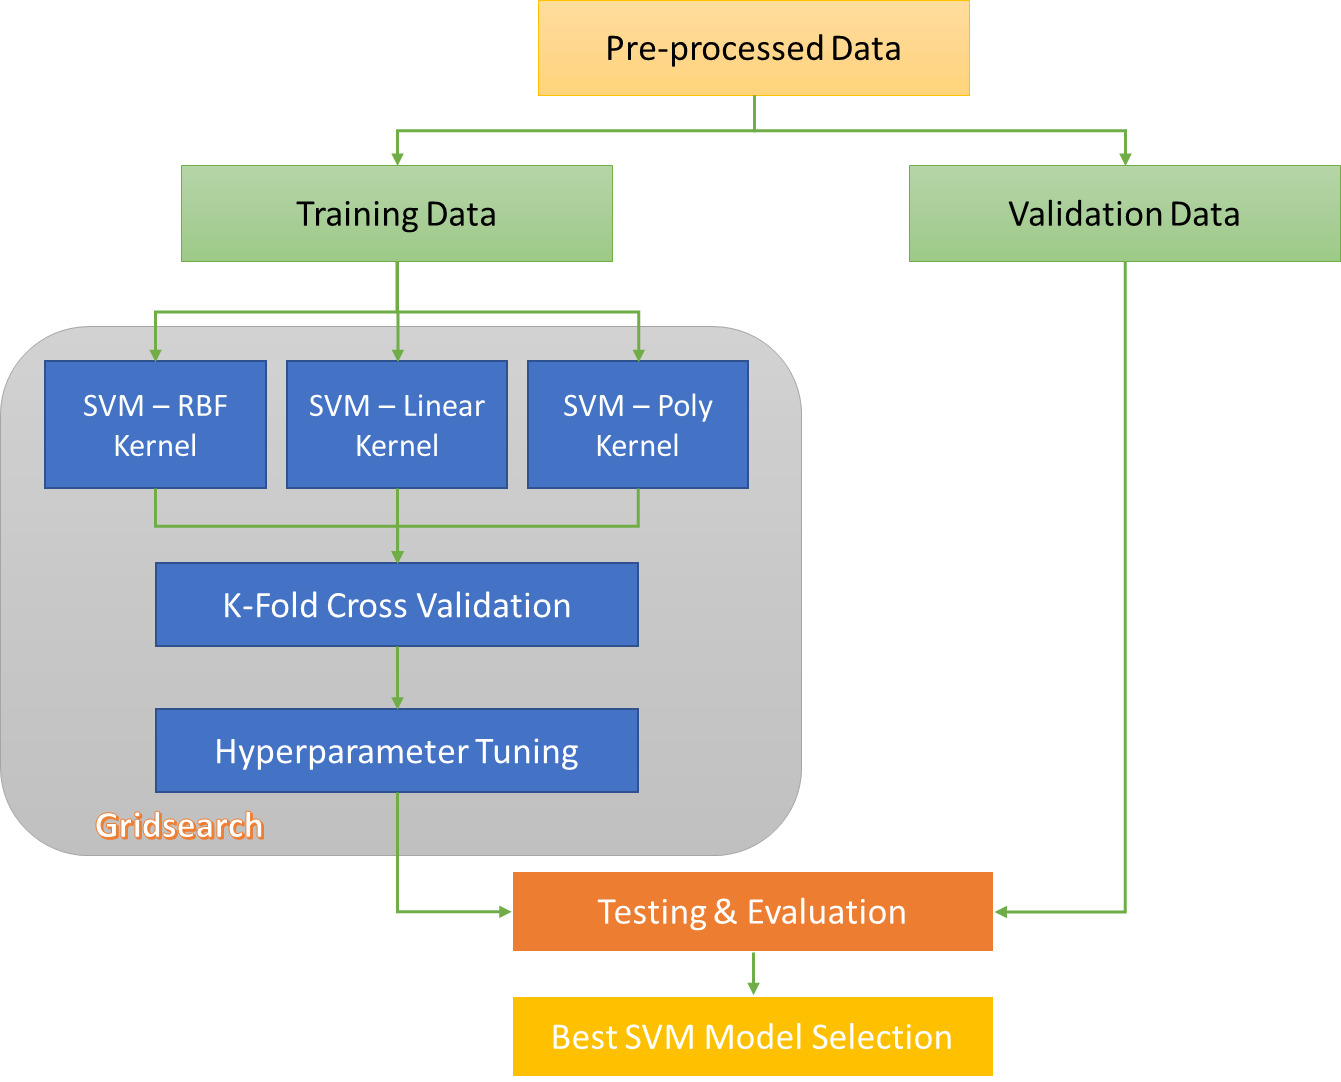

Figure 7: SVM Classifier Schematic Diagram

In [ ]:
base_svm = SVC(cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE)
base_svm_sampled = SVC(cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE)

Training base models

In [ ]:
base_svm.fit(X_split_train, y_split_train)
base_svm_sampled.fit(X_sampled_split_train, y_sampled_split_train)

print("Base SVM score for unsampled train data: ", round(base_svm.score(X_split_train, y_split_train), 3))
print("Base SVM score for unsampled validation data: ", round(base_svm.score(X_split_val, y_split_val), 3))

print("Base SVM score for sampled train data: ", round(base_svm_sampled.score(X_sampled_split_train, y_sampled_split_train), 3))
print("Base SVM score for sampled validation data: ", round(base_svm_sampled.score(X_sampled_split_val, y_sampled_split_val), 3))

Base SVM score for unsampled train data:  0.872
Base SVM score for unsampled validation data:  0.879
Base SVM score for sampled train data:  0.84
Base SVM score for sampled validation data:  0.851


From the scores above, it is evident that even with the unbalanced dataset, the model is doing well during the training phase. The training and validation scores of the models look promising for both unsampled and sampled data, however, model trained with sampled data has lower accuracies than the model trained with unsampled data. So, for the hyperparameter tuning of the models, only unsampled data is used henceforth.

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (5 marks)


The SVM model allows us to set or tune four different hyperparameters. The first one is "C", the inverse of the regularisation parameter _lambda_ which basically adds a small value to the loss function for avoiding overfitting during model training. The "C" parameter also dictates the margin of the SVM hyperplane. The default value of "C" is 1. Thus, typical values ranging between 0.1 to 1000 are chosen to see the effect of regularisation on the model's performance. Values less than 0.1 is not advisable as it would reduce the regularisation effect considerably.

In [ ]:
svm_param_grid_c = [{'C':[0.1, 1.0, 10.0, 100.0, 1000.0]}]

The second hyperparameter is "kernel". It is an interesting one because it allows linear and non-linear separation of the dataset during model training. For our task, one linear kernel, named "linear" and two non-linear kernels, namely "rbf" and "poly" are explored. "rbf" stands for Radial Basis Function and the "rbf" kernel is similar to the Gaussian distribution. The "poly" kernel uses a polynomial for representing the SVM hyperplane.

In [ ]:
svm_param_grid_kernel = [{'kernel':['linear', 'poly', 'rbf']}]

The third hyperparameter is "gamma" which is used by the non-linear kernels only, as curvature weight for their decision hyperplanes. To start with, various values ranging from 0.01 to 100 are considered for tuning "gamma". Later, if required based on the model's training performance, newer values can be tried for "gamma" during hyperparameter tuning. 

In [ ]:
svm_param_grid_gamma = [{'gamma':[0.01, 0.1, 1.0, 10.0, 100.0]}]

The last and fourth hyperparameter is "degree" which basically dictates the polynomial degree of the hyperplane generated by the "poly" kernel during model training. The default "degree" is 3. The parameter "degree" cannot be set to one for the "poly" kernel, as it will make the kernel a linear one and also, "degree" greater than 4 is not recommended as it can make the model very slow. Hence, "degree" is set to 2, 3, and 4 during hyperparameter tuning.

In [ ]:
svm_param_grid_degree = [{'degree':[2, 3, 4]}]

### c) Optimising hyper parameters (5 marks) 


Below is a function to optimise SVM hyperparameters and to save the search results in a pickle file for future reuse.

In [ ]:
def optimize_svm_hyperparameters(svm_classifier, X, y, param_grid, n_cv=5, dump_filename=None):    
    """
    Function to optimize the hyperparameters of a classifier.
    """
    # Creating an object of StratifiedKFold cross-validator
    kfcv = StratifiedKFold(n_splits=n_cv, random_state=RANDOM_STATE, shuffle=True)

    # Creating an object of GridSearchCV for optimizing the hyperparameters
    gridsearch = GridSearchCV(svm_classifier, 
                              param_grid, 
                              cv=kfcv, 
                              scoring=['accuracy', 'f1', 'precision', 'recall'],
                              return_train_score=True, 
                              refit='accuracy',
                              n_jobs=-2)            # To use all the processors available

    # Training the classifier
    gridsearch.fit(X, y)
    
    if dump_filename is not None:
        jl.dump(gridsearch, dump_filename+'.pkl')

    return gridsearch

As the regularisation parameter "C" is related to the loss calculation and is independent of the other three hyperparameters, it is the first hyperparameter chosen for tuning.

In [ ]:
# Uncomment to train and optimize 'C' hyperparameter for SVM model
# svm_c_optimized = optimize_svm_hyperparameters(SVC(cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE),
#                                                X_split_train,
#                                                y_split_train,
#                                                svm_param_grid_c,
#                                                dump_filename='svm_c')

# Loading the 'C' optimized SVM model from the saved file. Comment this if training the SVM
svm_c_optimized = jl.load('svm_c.pkl', 'r')

print("Best param: ", svm_c_optimized.best_params_)
print("Best score: ", round(svm_c_optimized.best_score_, 3))
print("Training score: ", round(svm_c_optimized.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(svm_c_optimized.score(X_split_val, y_split_val), 3))

Best param:  {'C': 100.0}
Best score:  0.886
Training score:  0.885
Validation score:  0.892


The optimum value of the hyperparameter "C" is found to be 100 and from here onwards, "C" is always set to 100.

In [ ]:
SVM_BEST_C = svm_c_optimized.best_params_['C']

The next hyperparameter to be tuned is the "kernel" as hyperparameters "degree" and "gamma" are only used by the non-linear kernels. It will be great to see which kernel perfroms the best on our dataset.

In [ ]:
# Uncomment to train and optimize 'kernel' hyperparameter for SVM model
# svm_kernel_optimized = optimize_svm_hyperparameters(SVC(C=SVM_BEST_C, cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE),
#                                                     X_split_train,
#                                                     y_split_train,
#                                                     svm_param_grid_kernel,
#                                                     dump_filename='svm_kernel')

# Loading the 'kernel' optimized SVM model from the saved file. Comment this if training the SVM
svm_kernel_optimized = jl.load('svm_kernel.pkl', 'r')

print("Best param: ", svm_kernel_optimized.best_params_)
print("Best score: ", round(svm_kernel_optimized.best_score_, 3))
print("Training score: ", round(svm_kernel_optimized.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(svm_kernel_optimized.score(X_split_val, y_split_val), 3))

Best param:  {'kernel': 'linear'}
Best score:  0.896
Training score:  0.897
Validation score:  0.904


With the default settings for "gamma" and "degree" parameters, "linear" kernel outweighs "rbf" and "ploy" kernels in terms of training and validation scores. Selecting the "linear" kernel as the best kernel is not logical because best values for the "gamma" and "degree" parameters are yet to be found for the non-linear models "rbf" and "poly". Thus, let us search for the optimum "degree" and "gamma" values before jumping to any conclusion here. 

In [ ]:
# Uncomment to train and optimize 'gamma' hyperparameter for SVM model
# svm_gamma_optimized = optimize_svm_hyperparameters(SVC(C=SVM_BEST_C, cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE),
#                                                        X_split_train,
#                                                        y_split_train,
#                                                        svm_param_grid_gamma,
#                                                        dump_filename='svm_gamma')

# Loading the 'gamma' optimized SVM model from the saved file. Comment this if training the SVM
svm_gamma_optimized = jl.load('svm_gamma.pkl', 'r')

print("Best param: ", svm_gamma_optimized.best_params_)
print("Best score: ", round(svm_gamma_optimized.best_score_, 3))
print("Training score: ", round(svm_gamma_optimized.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(svm_gamma_optimized.score(X_split_val, y_split_val), 3))

Best param:  {'gamma': 0.01}
Best score:  0.898
Training score:  0.913
Validation score:  0.901


The best value of "gamma" obtained is 0.01. To note, the training performance of this model is better than the linear model above. Thus, not rushing with the best model decision earlier was a wise choice.

In [ ]:
SVM_BEST_GAMMA = svm_gamma_optimized.best_params_['gamma']

As the hyperparemeter "degree" is not used by "rbf" kernel, let us find the best values of "gamma" and "degree" for the "poly" kernel. 

In [ ]:
# Uncomment to train and optimize 'degree' hyperparameter for SVM model
# svm_degree_optimized = optimize_svm_hyperparameters(SVC(C=SVM_BEST_C, gamma=SVM_BEST_GAMMA, kernel='poly', cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE), 
#                                                     X_split_train,
#                                                     y_split_train,
#                                                     svm_param_grid_degree,
#                                                     dump_filename='svm_degree')

# Loading the 'degree' optimized SVM model from the saved file. Comment this if training the SVM
svm_degree_optimized = jl.load('svm_degree.pkl', 'r')

print("Best param: ", svm_degree_optimized.best_params_)
print("Best score: ", round(svm_degree_optimized.best_score_, 3))
print("Training score: ", round(svm_degree_optimized.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(svm_degree_optimized.score(X_split_val, y_split_val), 3))

Best param:  {'degree': 2}
Best score:  0.896
Training score:  0.899
Validation score:  0.902


In [ ]:
SVM_BEST_DEGREE = svm_degree_optimized.best_params_['degree']

### d) Performance metrics for training (5 marks)

In [ ]:
def plot_svm_training_n_validation_acc(svm_grid_result, svm_param, n_cv):
    fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
    kfolds = np.arange(1, n_cv+1, dtype=int)

    for indx, param in enumerate(svm_grid_result.cv_results_['param_{svm_param}'.format(svm_param=svm_param)]):
        train_acc = []
        val_acc = []

        for i in kfolds:
            train_acc.append(svm_grid_result.cv_results_['split{i}_train_accuracy'.format(i=int(i) - 1)][indx])
            val_acc.append(svm_grid_result.cv_results_['split{i}_test_accuracy'.format(i=int(i) - 1)][indx])

        axs[:][0].plot(kfolds, train_acc, label=svm_param +": "+str(param))
        axs[:][1].plot(kfolds, val_acc, label=svm_param +": "+str(param))
        
        axs[:][0].set_xlabel("K-folds", fontsize=12)
        axs[:][0].set_ylabel("Training accuracy", fontsize=12)
        axs[:][1].set_xlabel("K-folds", fontsize=12)
        axs[:][1].set_ylabel("Validation accuracy", fontsize=12)
        axs[:][0].legend(fontsize=10)
        axs[:][1].legend(fontsize=10)

    fig.suptitle("SVM {svm_param} parameters training and validation accuracy".format(svm_param=svm_param), fontsize=15)
    fig.show()

Comparison of the training and validation accuracies obtained with different values of hyperparameter "C" is shown in the plots below. Higher the values of "C" is, better the model's training perfromance is. 

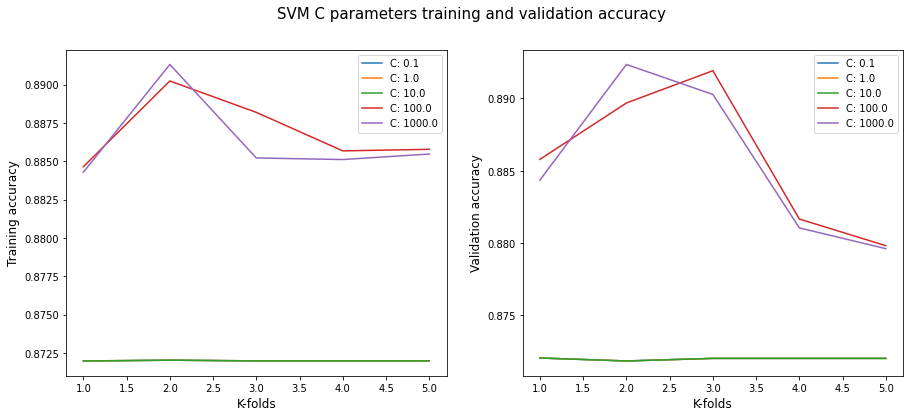

In [ ]:
plot_svm_training_n_validation_acc(svm_c_optimized, 'C', 5)

Comparison of training perfromances of different kernels is presented below. It is clearly evident that among all the used kernels, the non-linear kernels "rbf" and "poly" performance is nearly same. The "linear" kernel performs a bit better than the non-linear models. The "sigmoid" kernel didn't perform well compared to the other non-linear models, thus is not considered in this model.

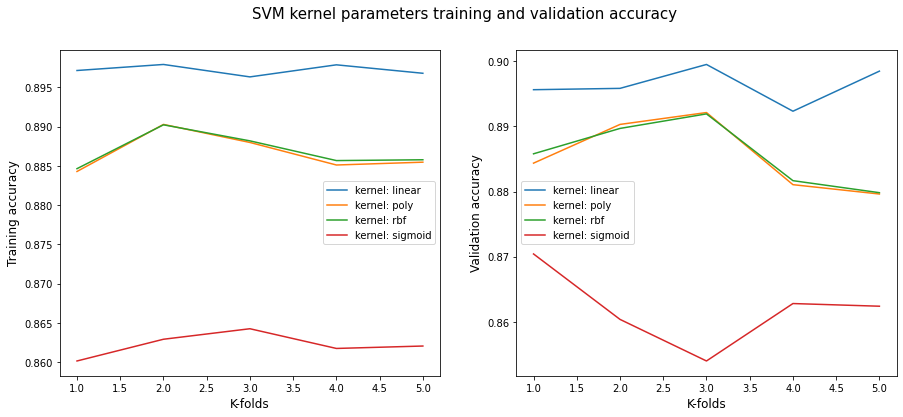

In [ ]:
plot_svm_training_n_validation_acc(svm_kernel_optimized, 'kernel', 5)

The plots below compares the training and validation performances of "rbf" kernel with different "gamma" values. It can be seen that, for higher "gamma" values the training accuracy is close to 100% but validation accuracies are lower compared to models with lower "gamma" values. In other words, for the smallest "gamma", the gap between the training accuracy and validation accuracy is the lowest, as a result the model is overfitting lesser compared to other models with higher gamma values.

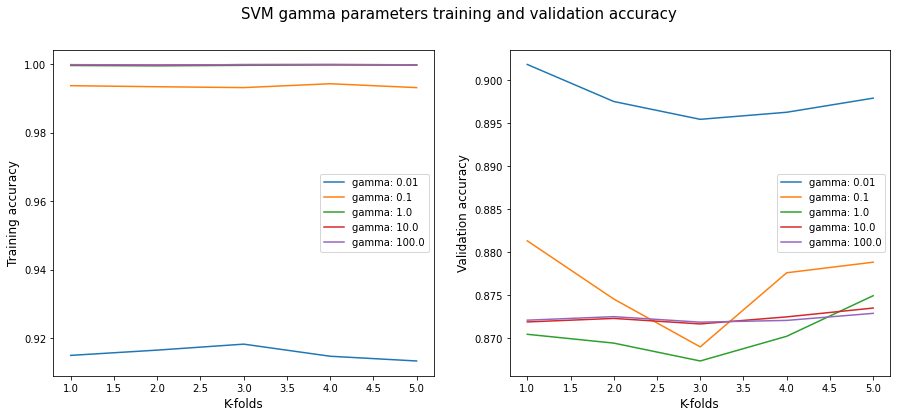

In [ ]:
plot_svm_training_n_validation_acc(svm_gamma_optimized, 'gamma', 5)

The "poly" kernel model is trained with different "degree" values. As seen from the plots below, as the degree value increases, the training accuracy increases whereas validation accuracy decreases. Thus, when "degree" is set to 2, best validation perfeomance is achieved.

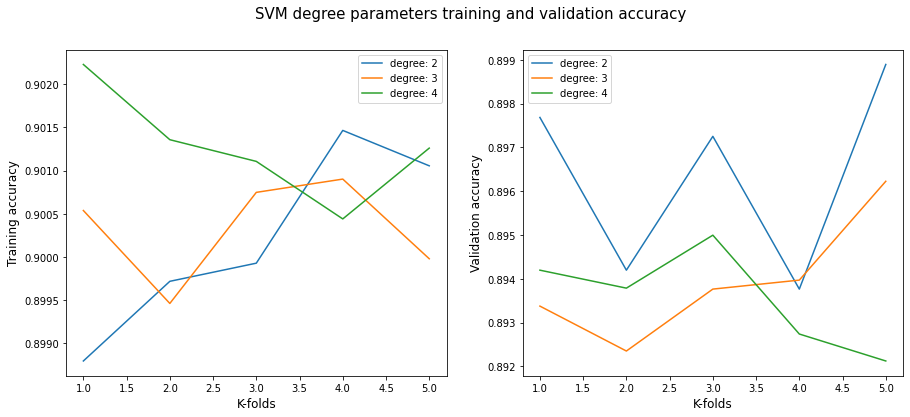

In [ ]:
plot_svm_training_n_validation_acc(svm_degree_optimized, 'degree', 5)

Best SVM model selection

SVM-LINEAR model with best "C" value

In [ ]:
best_linear_svm = SVC(C=SVM_BEST_C, kernel='linear', cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE)
best_linear_svm.fit(X_split_train, y_split_train)
print("Training score: ", round(best_linear_svm.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(best_linear_svm.score(X_split_val, y_split_val), 3))

Training score:  0.897
Validation score:  0.904


SVM-RBF model with best "gamma" and "C" values

In [ ]:
best_rbf_svm = SVC(C=SVM_BEST_C, gamma=SVM_BEST_GAMMA, kernel='rbf', cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE)
best_rbf_svm.fit(X_split_train, y_split_train)
print("Training score: ", round(best_rbf_svm.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(best_rbf_svm.score(X_split_val, y_split_val), 3))

Training score:  0.913
Validation score:  0.901


SVM-POLY model with best "gamma", "degree" and "C" values

In [ ]:
best_poly_svm = SVC(C=SVM_BEST_C, gamma=SVM_BEST_GAMMA, kernel='poly', degree=SVM_BEST_DEGREE, cache_size=SVM_CACHE_SIZE, random_state=RANDOM_STATE)
best_poly_svm.fit(X_split_train, y_split_train)
print("Training score: ", round(best_poly_svm.score(X_split_train, y_split_train), 3))
print("Validation score: ", round(best_poly_svm.score(X_split_val, y_split_val), 3))

Training score:  0.899
Validation score:  0.9


The function below prints the classification models's performance report.

In [ ]:
def print_model_analysis_report(model, X, y, model_name=None): 
    
    """
    This function prints the model performance analysis report and plots the confusion matrix too.  
    """
    y_true = y

    # Predict class using trained model
    y_pred = model.predict(X)
    
    if model_name is None:
        model_name = ''

    print(f"------------- {model_name} Model Analysis Report --------------\n")
    print("Classification Accuracy :", round(accuracy_score(y_true, y_pred)*100, 3), "%")
    print("Balanced Accuracy :", round(balanced_accuracy_score(y_true, y_pred)*100, 3), "%")
    print("F1 score :", round(f1_score(y_true, y_pred, average='weighted')*100, 3), "%")
    print("Misclassification Rate :", round((1-accuracy_score(y_true, y_pred))*100, 3), "%")

    print(f"\n------------- {model_name} Model Classification Report --------------\n")
    print(classification_report(y_true, y_pred, target_names=['No', 'Yes']))
    
    print(f"\n------------- {model_name} Model Confusion Matrix --------------\n")
    ConfusionMatrixDisplay.from_estimator(model, X, y, cmap='PuRd', display_labels=['No', 'Yes'])

    plt.show()
    
    print(f"\n------------- {model_name} Model Precision-Recall Curve  --------------\n")
    PrecisionRecallDisplay.from_estimator(model, X, y, name=model_name)

    plt.show()

Performance analysis report for the best SVM-RBF model

------------- SVM(RBF kernel) Model Analysis Report --------------

Classification Accuracy : 91.039 %
Balanced Accuracy : 71.576 %
F1 score : 90.103 %
Misclassification Rate : 8.961 %

------------- SVM(RBF kernel) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.93      0.98      0.95     26620
         Yes       0.74      0.46      0.56      3858

    accuracy                           0.91     30478
   macro avg       0.83      0.72      0.76     30478
weighted avg       0.90      0.91      0.90     30478


------------- SVM(RBF kernel) Model Confusion Matrix --------------



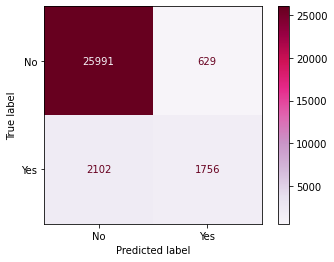


------------- SVM(RBF kernel) Model Precision-Recall Curve  --------------



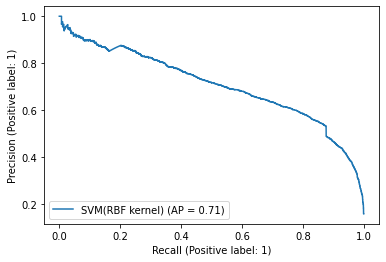

In [ ]:
print_model_analysis_report(best_rbf_svm, X_train, y_train, 'SVM(RBF kernel)')

Performance analysis report for the best SVM-LINEAR model

------------- SVM(Linear kernel) Model Analysis Report --------------

Classification Accuracy : 89.825 %
Balanced Accuracy : 68.266 %
F1 score : 88.667 %
Misclassification Rate : 10.175 %

------------- SVM(Linear kernel) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.92      0.97      0.94     26620
         Yes       0.67      0.39      0.50      3858

    accuracy                           0.90     30478
   macro avg       0.79      0.68      0.72     30478
weighted avg       0.89      0.90      0.89     30478


------------- SVM(Linear kernel) Model Confusion Matrix --------------



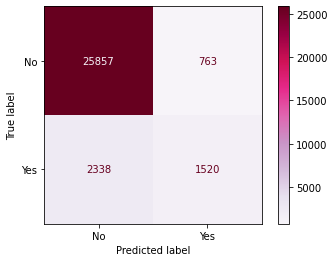


------------- SVM(Linear kernel) Model Precision-Recall Curve  --------------



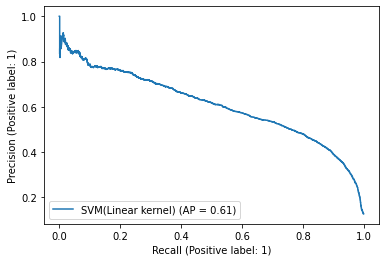

In [ ]:
print_model_analysis_report(best_linear_svm, X_train, y_train, 'SVM(Linear kernel)')

Performance analysis report for the best SVM-POLY model

------------- SVM(Polynomial kernel) Model Analysis Report --------------

Classification Accuracy : 89.99 %
Balanced Accuracy : 70.022 %
F1 score : 89.073 %
Misclassification Rate : 10.01 %

------------- SVM(Polynomial kernel) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.92      0.97      0.94     26620
         Yes       0.66      0.43      0.52      3858

    accuracy                           0.90     30478
   macro avg       0.79      0.70      0.73     30478
weighted avg       0.89      0.90      0.89     30478


------------- SVM(Polynomial kernel) Model Confusion Matrix --------------



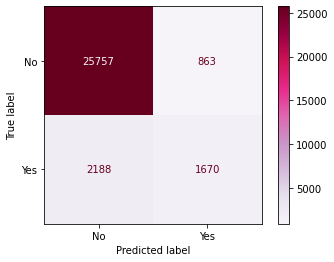


------------- SVM(Polynomial kernel) Model Precision-Recall Curve  --------------



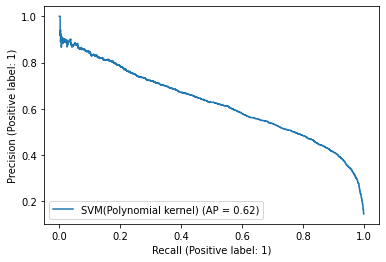

In [ ]:
print_model_analysis_report(best_poly_svm, X_train, y_train, 'SVM(Polynomial kernel)')

Among all the three best SVM models obtained, the model with "rbf" kernel, "C"=100, and "gamma"=0.01 seems to be outperforming all other models, as it achieves a training accuracy of 91.039%. However, other two models are doing equally well and hence all three models need to be evaluated with the testing data. 

## 5. Technique 2 - Artificial Neural Network

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process (8 marks)

100-200 words


The second model of choice is an Artificial Neural Network(ANN) model, which is basically a fully-connected multi-layer perceptron. The main reason behind choosing the ANN model is the conclusion reached earlier during the analysis of SVM models. The best SVM model found was the "RBF" model, and as the "RBF" kernel is a non-linear kernel, it is highly possible for our dataset to be non-linearly separated. Having said that, as neural networks are widely known to excel in modelling non-linear and complex relationships, they might model our dataset well, and thus ANN is chosen as the second model. The other less important reasons include the following:

1. To check the performance of different non-linear activation functions on our dataset.

2. To investigate the performance of the ANN model with highly unbalanced data.

3. To see how well ANN learns and whether ANN could make better decisions than SVM for the same data.


The schematic below portrays the building of the Neural network model, its training and validation, and hyperparameter tuning followed by testing and evaluation.

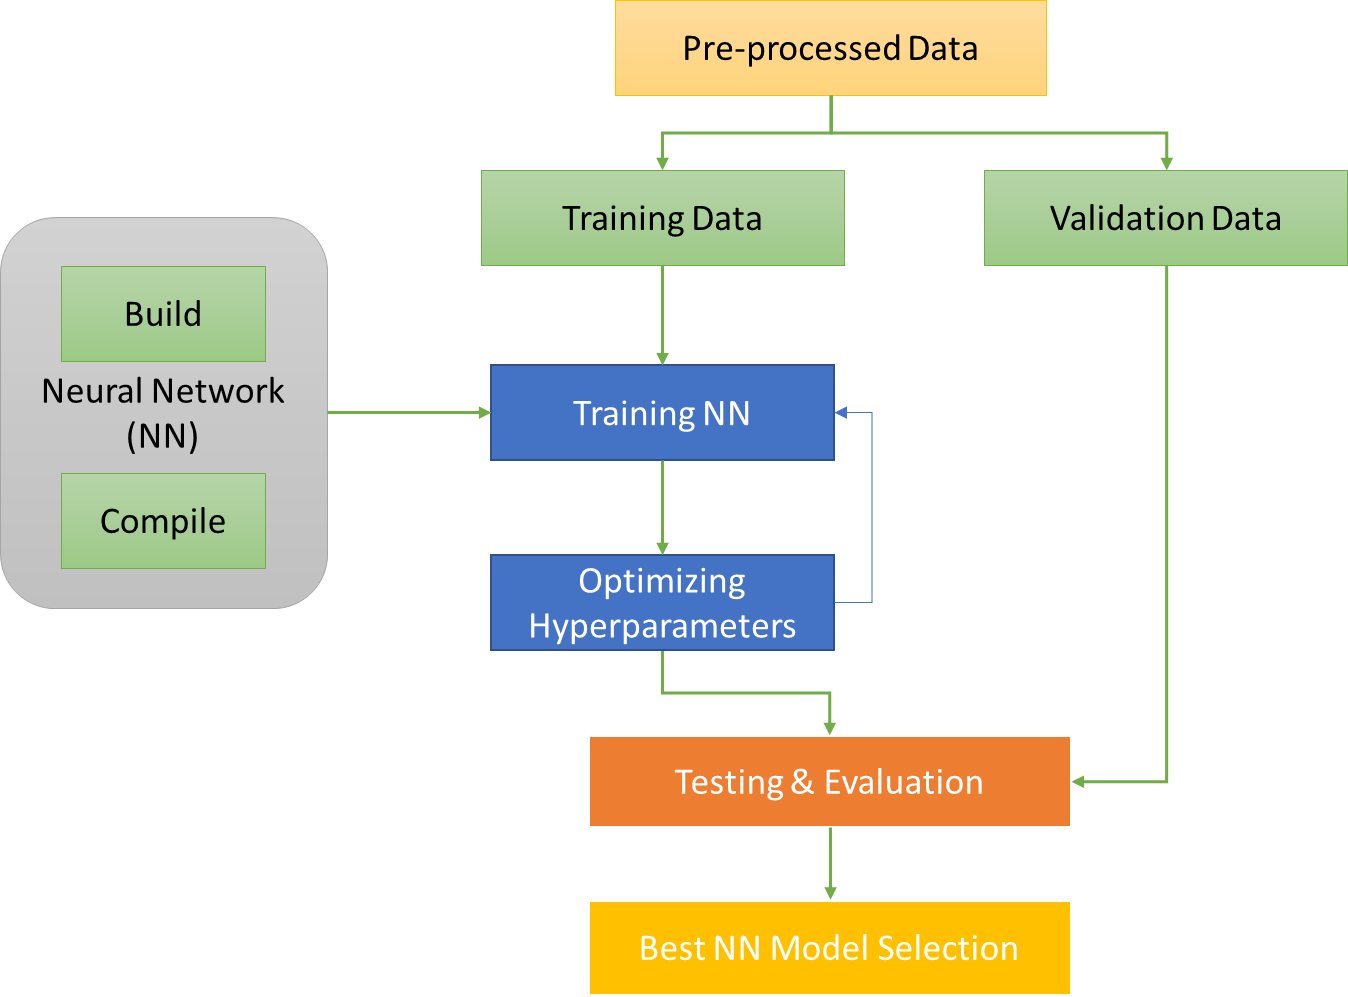

Figure 8: Neural Network Schematic diagram

Base ANN classifier

In [ ]:
def build_nn_binary_classfier(nfeatures, 
                              hidden_units_list,
                              hidden_layer_activation='relu', 
                              output_layer_activation='sigmoid',
                              optimizer='sgd',
                              loss='mae',
                              metrics=['binary_accuracy']):
    """
    This function builds neural network model for binary classification
    """
    # Reset backend session
    tf.keras.backend.clear_session()

    nn_model = Sequential()

    # Adding input layer to model
    nn_model.add(layers.Input(shape=(nfeatures,)))

    # Adding hidden layer
    for i in range(len(hidden_units_list)):
        nn_model.add(layers.Dense(hidden_units_list[i], activation=hidden_layer_activation))

    # Adding output layer
    nn_model.add(layers.Dense(1, activation=output_layer_activation))

    # Compiling the model
    nn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    print(nn_model.summary())

    return nn_model

In [ ]:
base_nn_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          [50])

base_nn_history = base_nn_model.fit(X_split_train, 
                                    y_split_train,
                                    validation_data=(X_split_val, y_split_val),
                                    batch_size=512, 
                                    epochs=60,
                                    verbose=0,
                                    workers=4,
                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(base_nn_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(base_nn_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.375
Validation accuracy:  0.374


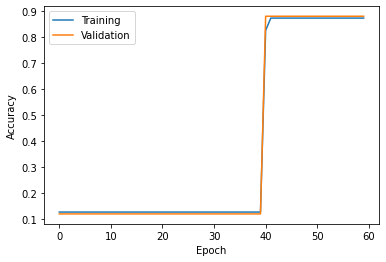

In [ ]:
plt.plot(base_nn_history.epoch, base_nn_history.history['binary_accuracy'], label='Training')
plt.plot(base_nn_history.epoch, base_nn_history.history['val_binary_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
base_nn_sampled_model = build_nn_binary_classfier(X_sampled_split_train.shape[1], 
                                                  [50])

base_nn_sampled_history = base_nn_sampled_model.fit(X_sampled_split_train, 
                                                    y_sampled_split_train,
                                                    validation_data=(X_sampled_split_val, y_sampled_split_val),
                                                    batch_size=512, 
                                                    epochs=60,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(base_nn_sampled_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(base_nn_sampled_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.5
Validation accuracy:  0.504


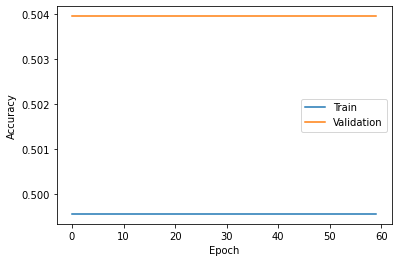

In [ ]:
plt.plot(base_nn_sampled_history.epoch, base_nn_sampled_history.history['binary_accuracy'], label='Train')
plt.plot(base_nn_sampled_history.epoch, base_nn_sampled_history.history['val_binary_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

Just like SVM models, base NN models trained for both unsampled training data performed better than sampled training data. Thus, unsampled data is used for hyperparameter tuning and model training. 

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (5 marks)


For our neural network model, six important parameters are considered for hyperparameter tuning. The first one is Optimizer. From all the options avaiable, three important optimizers are selected. They are RMSProp, Adam and SGD optimizers, respectively. The SGD optimiser basically does gradient descent, the RMSProp uses the second moments with a decay rate and the Adam considers both the first and second moments and includes the concept of momentum as well. The default optimizer used is SGD, so explicitly it is not defined below.

In [ ]:
nn_rms_optimizer='rmsprop'
nn_adam_optimizer='adam'

The second hyperparameter tuned is the loss function. The default loss function set is Mean Absolute Error(MAE) and other three options explored are Mean Squared Error(MSE), and Binary Cross Entropy(BCE) and Hinge loss functions, respectively.

In [ ]:
nn_mse_loss='mse'
nn_ce_loss='binary_crossentropy'
nn_hinge_loss='hinge'

The third hyperparameter chosen in the activation function used in the neural network layers. There are a plenty of options to choose, however, for this project, only three options, 'tanh', 'relu' and 'sigmoid' are investigated.

In [ ]:
nn_tanh_activation='tanh'
nn_relu_activation='relu'
nn_sig_activation='sigmoid'

The fourth and most important hyperparameter is the number of hidden layers. Apart from the input and the output layers, multiple hidden layers are added to the base neural network. A minimum of two and a maximum of 11 hidden layers are added to the ANN during hyperparameter tuning.

In [ ]:
nn_2_hlayer_param = [20, 20]
nn_3_hlayer_param = [20, 50, 20]
nn_5_hlayer_param = [20, 50, 80, 50, 20]
nn_7_hlayer_param = [10, 20, 30, 40, 30, 20, 10]
nn_9_hlayer_param = [10, 20, 30, 40, 50, 40, 30, 20, 10]
nn_11_hlayer_param = [10, 20, 30, 40, 50, 60, 50, 40, 30, 20, 10]

The fifth hyperparameter is number of epochs. For the default batch size of 512, the optimum model is trained for different number of epochs as shown below.

In [ ]:
epochs = [60,100,150,250,500]

After tuning the hyperparameters of the NN models, and selecting the number of epochs, lastly, the batch size is tuned. Six different batch sizes starting from 64 to 2048 are used in this project.

In [ ]:
batch_sizes = [64, 128, 256, 512, 1024, 2048]

Note: For the neural network model, after a hyperparameter is tuned, its best value is passed on to the subsequent iterations, till the best NN model is obtained.

### c) Optimising hyper parameters (5 marks)


#### Optimizer Selection

In [ ]:
#RMS Optimizer
nn_rms_optimizer_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                                   [50],
                                                   optimizer=nn_rms_optimizer)

nn_rms_optimizer_model_history = nn_rms_optimizer_model.fit(X_split_train, 
                                                        y_split_train,
                                                        validation_data=(X_split_val, y_split_val),
                                                        batch_size=512, 
                                                        epochs=60,
                                                        verbose=0,
                                                        workers=4,
                                                        use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_rms_optimizer_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_rms_optimizer_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.871
Validation accuracy:  0.879


In [ ]:
#Adam Optimizer
nn_adam_optimizer_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                                   [50],
                                                   optimizer=nn_adam_optimizer)

nn_adam_optimizer_model_history = nn_adam_optimizer_model.fit(X_split_train, 
                                                        y_split_train,
                                                        validation_data=(X_split_val, y_split_val),
                                                        batch_size=512, 
                                                        epochs=60,
                                                        verbose=0,
                                                        workers=4,
                                                        use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_adam_optimizer_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_adam_optimizer_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.872
Validation accuracy:  0.879


As the training performance of the Adam optimizer outstrips the SGD and RMSProp optimizers, from here onwards Adam optimiser is chosen as the best optimizer.

#### Loss Function Selection

In [ ]:
#MSE Loss
nn_mse_loss_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                              [50],
                                              optimizer=nn_adam_optimizer,
                                              loss=nn_mse_loss)

nn_mse_loss_model_history = nn_mse_loss_model.fit(X_split_train, 
                                                y_split_train,
                                                validation_data=(X_split_val, y_split_val),
                                                batch_size=512, 
                                                epochs=60,
                                                verbose=0,
                                                workers=4,
                                                use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_mse_loss_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_mse_loss_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.872
Validation accuracy:  0.879


In [ ]:
#BCE Loss
nn_ce_loss_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                              [50],
                                              optimizer=nn_adam_optimizer,
                                              loss=nn_ce_loss)

nn_ce_loss_model_history = nn_ce_loss_model.fit(X_split_train, 
                                                y_split_train,
                                                validation_data=(X_split_val, y_split_val),
                                                batch_size=512, 
                                                epochs=60,
                                                verbose=0,
                                                workers=4,
                                                use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_ce_loss_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_ce_loss_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.884
Validation accuracy:  0.897


In [ ]:
#Hinge Loss
nn_hinge_loss_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                              [50],
                                              optimizer=nn_adam_optimizer,
                                              loss=nn_hinge_loss)

nn_hinge_loss_model_history = nn_hinge_loss_model.fit(X_split_train, 
                                                y_split_train,
                                                validation_data=(X_split_val, y_split_val),
                                                batch_size=512, 
                                                epochs=60,
                                                verbose=0,
                                                workers=4,
                                                use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_hinge_loss_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_hinge_loss_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.871
Validation accuracy:  0.879


As the training and validation accuracies obtained with binary cross-entropy(BCE) loss function is higher than other loss functions, BCE loss function is chosen as the optimum loss function.

#### Activation Function Selection

In [ ]:
#tanh activation
nn_hlayer_tanh_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                                 [50],
                                                 hidden_layer_activation=nn_tanh_activation,
                                                 optimizer=nn_adam_optimizer,
                                                 loss=nn_ce_loss)

nn_hlayer_tanh_model_history = nn_hlayer_tanh_model.fit(X_split_train, 
                                                        y_split_train,
                                                        validation_data=(X_split_val, y_split_val),
                                                        batch_size=512, 
                                                        epochs=60,
                                                        verbose=0,
                                                        workers=4,
                                                        use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_hlayer_tanh_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_hlayer_tanh_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.892
Validation accuracy:  0.896


In [ ]:
#sigmoid activation
nn_hlayer_sig_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                                [50],
                                                hidden_layer_activation=nn_sig_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_hlayer_sig_model_history = nn_hlayer_sig_model.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=512, 
                                                    epochs=60,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_hlayer_sig_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_hlayer_sig_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.892
Validation accuracy:  0.898


In [ ]:
#relu activation
nn_hlayer_relu_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                                 [50],
                                                 hidden_layer_activation=nn_relu_activation,
                                                 optimizer=nn_adam_optimizer,
                                                 loss=nn_ce_loss)

nn_hlayer_relu_model_history = nn_hlayer_relu_model.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=512, 
                                                    epochs=60,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_hlayer_relu_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_hlayer_relu_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.893
Validation accuracy:  0.899


When ReLU activation function is selected, best training results are obtained. Thus, ReLU activation function is chosen as our activation function of choice.

#### Hidden Layers Selection 

In [ ]:
# 2 hidden layers
nn_2_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_2_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_2_hl_model_history = nn_2_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_2_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_2_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                720       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.884
Validation accuracy:  0.895


In [ ]:
# 3 hidden layers
nn_3_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_3_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_3_hl_model_history = nn_3_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_3_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_3_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                720       
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,811
Trainable params: 2,811
Non-trainable params: 0
_________________________________________________________________
None
Training accuracy:  0.891
Validation accuracy:  0.896


In [ ]:
# 5 hidden layers
nn_5_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_5_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_5_hl_model_history = nn_5_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_5_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_5_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                720       
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 80)                4080      
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,941
Trainable params: 10,941
Non-traina

In [ ]:
# 7 hidden layers
nn_7_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_7_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_7_hl_model_history = nn_7_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_7_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_7_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 30)                1230      
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 10)                2

In [ ]:
# 9 hidden layers
nn_9_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_9_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_9_hl_model_history = nn_9_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
# 11 hidden layers
nn_11_hl_model = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_11_hlayer_param,
                                          hidden_layer_activation=nn_relu_activation,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_11_hl_model_history = nn_11_hl_model.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=60,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_11_hl_model_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_11_hl_model_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 60)                3060      
                                                                 
 dense_6 (Dense)             (None, 50)                3

Neural network with 9 hidden layers obtained highest training and validation accuracies. Hence, the number of hidden layers selected for the best model is 9.

#### Epoch Selection

In [ ]:
# Epoch 100
nn_9_hl_model_ep100 = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_9_hlayer_param,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_9_hl_model_ep100_history = nn_9_hl_model_ep100.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=100,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_ep100_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_ep100_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
# Epoch 150
nn_9_hl_model_ep150 = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_9_hlayer_param,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_9_hl_model_ep150_history = nn_9_hl_model_ep150.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=200,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_ep150_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_ep150_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
# Epoch 250
nn_9_hl_model_ep250 = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_9_hlayer_param,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_9_hl_model_ep250_history = nn_9_hl_model_ep250.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=250,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_ep250_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_ep250_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
# Epoch 500
nn_9_hl_model_ep500 = build_nn_binary_classfier(X_split_train.shape[1], 
                                          nn_9_hlayer_param,
                                          optimizer=nn_adam_optimizer,
                                          loss=nn_ce_loss)

nn_9_hl_model_ep500_history = nn_9_hl_model_ep500.fit(X_split_train, 
                                          y_split_train,
                                          validation_data=(X_split_val, y_split_val),
                                          batch_size=512, 
                                          epochs=500,
                                          verbose=0,
                                          workers=4,
                                          use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_ep500_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_ep500_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

For the default batch size of 512 and all other hyperparaameters set to their optimum values, when the number of epochs is set to 500, best training and validation performance is obtained for the neural network model. Thus, the number of epochs is set to 500. This parameter is a crucial one, as it heavily affects the training results when appropriate batch size is selected.

#### Batch Size Selection

In [ ]:
#batch size 64
nn_9_hl_model_bs64 = build_nn_binary_classfier(X_split_train.shape[1], 
                                                nn_9_hlayer_param,
                                                hidden_layer_activation=nn_relu_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_9_hl_model_bs64_history = nn_9_hl_model_bs64.fit(X_split_train, 
                                                y_split_train,
                                                validation_data=(X_split_val, y_split_val),
                                                batch_size=64, 
                                                epochs=500,
                                                verbose=0,
                                                workers=4,
                                                use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_bs64_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_bs64_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
#batch size 128
nn_9_hl_model_bs128 = build_nn_binary_classfier(X_split_train.shape[1], 
                                                nn_9_hlayer_param,
                                                hidden_layer_activation=nn_relu_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_9_hl_model_bs128_history = nn_9_hl_model_bs128.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=128, 
                                                    epochs=500,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_bs128_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_bs128_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
#batch size 256
nn_9_hl_model_bs256 = build_nn_binary_classfier(X_split_train.shape[1], 
                                                nn_9_hlayer_param,
                                                hidden_layer_activation=nn_relu_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_9_hl_model_bs256_history = nn_9_hl_model_bs256.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=256, 
                                                    epochs=500,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_bs256_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_bs256_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
#batch size 1024
nn_9_hl_model_bs1024 = build_nn_binary_classfier(X_split_train.shape[1], 
                                                nn_9_hlayer_param,
                                                hidden_layer_activation=nn_relu_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_9_hl_model_bs1024_history = nn_9_hl_model_bs1024.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=1024, 
                                                    epochs=500,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_bs1024_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_bs1024_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
#batch size 2048
nn_9_hl_model_bs2048 = build_nn_binary_classfier(X_split_train.shape[1], 
                                                nn_9_hlayer_param,
                                                hidden_layer_activation=nn_relu_activation,
                                                optimizer=nn_adam_optimizer,
                                                loss=nn_ce_loss)

nn_9_hl_model_bs2048_history = nn_9_hl_model_bs2048.fit(X_split_train, 
                                                    y_split_train,
                                                    validation_data=(X_split_val, y_split_val),
                                                    batch_size=2048, 
                                                    epochs=500,
                                                    verbose=0,
                                                    workers=4,
                                                    use_multiprocessing=True)

print("Training accuracy: ", round(np.mean(nn_9_hl_model_bs2048_history.history['binary_accuracy']), 3))
print("Validation accuracy: ", round(np.mean(nn_9_hl_model_bs2048_history.history['val_binary_accuracy']), 3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

Training with smaller batch sizes is slower and as the batch size increases the model performance decreases. Thus, a balance between timing and perfromance is to be found. For our case, batch size of 128, 256, and 512, all are doing well in terms of training and validation accuracies. 

### d) Performance metrics for training (5 marks)

Function to plot the classification results of the neural network models

In [ ]:
def plot_nn_training_n_validation_acc(nn_model_hists_dict, nn_param):
    fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

    for param, model_hist in nn_model_hists_dict.items():
        train_acc = model_hist.history['binary_accuracy']
        val_acc = model_hist.history['val_binary_accuracy']
        epoch = model_hist.epoch

        axs[:][0].plot(epoch, train_acc, label=param)
        axs[:][1].plot(epoch, val_acc, label=param)

        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        
        axs[:][0].set_xlabel("Epoch", fontsize=12)
        axs[:][0].set_ylabel("Training accuracy", fontsize=12)
        axs[:][0].set_ylim(0.855, 0.925)
        axs[:][0].legend(fontsize=10)

        axs[:][1].set_xlabel("Epoch", fontsize=12)
        axs[:][1].set_ylabel("Validation accuracy", fontsize=12)
        axs[:][1].set_ylim(0.855, 0.925)
        axs[:][1].legend(fontsize=10)

    fig.suptitle("NN {nn_param} parameter training and validation accuracy".format(nn_param=nn_param), fontsize=15)
    fig.show()

In [ ]:
nn_model_hists_optim = {'sgd': base_nn_history, 
                        'adam': nn_adam_optimizer_model_history, 
                        'rmsprop': nn_rms_optimizer_model_history}
nn_model_hists_lossfnc = {'mae': base_nn_history, 
                          'mse': nn_mse_loss_model_history,
                          'bce': nn_ce_loss_model_history,
                          'hinge':nn_hinge_loss_model_history}
nn_model_hists_actvfnc = {'sigmoid': nn_hlayer_sig_model_history,
                          'tanh': nn_hlayer_tanh_model_history,
                          'relu': nn_hlayer_relu_model_history}
nn_model_hists_hlayers = {'2-hidden layer': nn_2_hl_model_history,
                          '3-hidden layer': nn_3_hl_model_history,
                          '5-hidden layer': nn_5_hl_model_history,
                          '7-hidden layer': nn_7_hl_model_history,
                          '9-hidden layer': nn_9_hl_model_history,
                          '11-hidden layer': nn_11_hl_model_history}
nn_model_hists_bs = {'batch 64' : nn_9_hl_model_bs64_history, 
                          'batch 128' : nn_9_hl_model_bs128_history, 
                          'batch 256' : nn_9_hl_model_bs256_history, 
                          'batch 512' : nn_9_hl_model_history, 
                          'batch 1024' : nn_9_hl_model_bs1024_history,
                          'batch 2048' : nn_9_hl_model_bs2048_history}

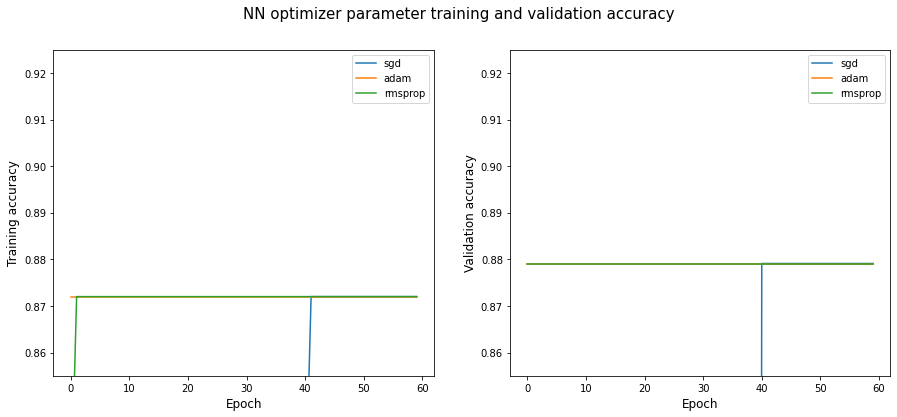

In [ ]:
plot_nn_training_n_validation_acc(nn_model_hists_optim, 'optimizer')

From the above plots, not much difference is found in the optimizers' performances in terms of accuracies. However, one point to notice is that the SGD optimzer takes more number of epochs for reaching the same accuracy as Adam and RMSProp optimizers. Even RMSProp takes a few more iterations than the Adam for reaching the same level of accuracy.

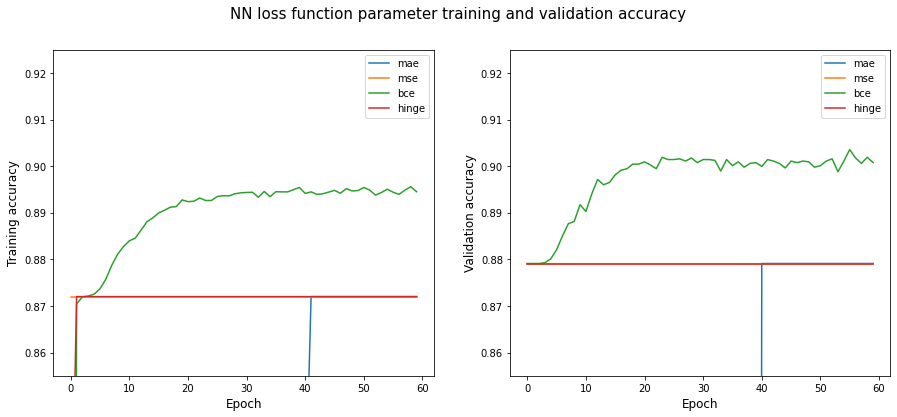

In [ ]:
plot_nn_training_n_validation_acc(nn_model_hists_lossfnc, 'loss function')

With the training and validation performances of models with different loss functions plotted, as shown above, it is clearly evident that binary cross-entropy(BCE) loss suits our classification task the best. The performances of MAE, MSE and Hinge loss function are very close to each other and MAE took more number of epochs to reach the same level of accuracy as MSE and Hinge.

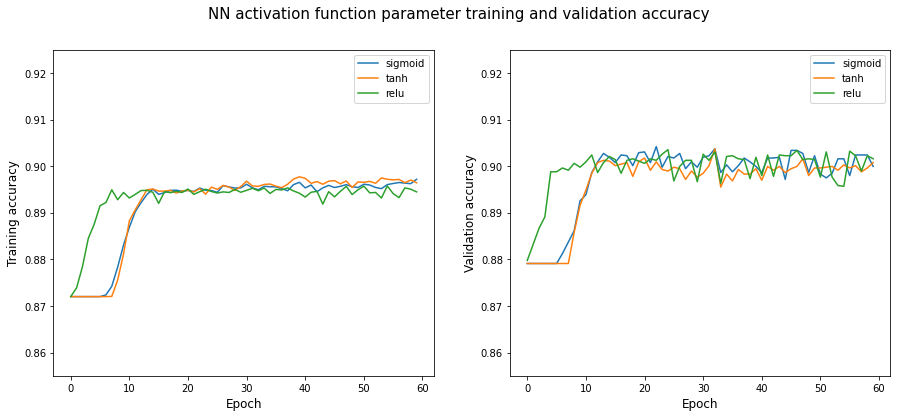

In [ ]:
plot_nn_training_n_validation_acc(nn_model_hists_actvfnc, 'activation function')

The patterns of training and validation performances of the three activation functions are similar. However, as the mean validation accuracy of ReLU is the highest, it is chosen for our best model.

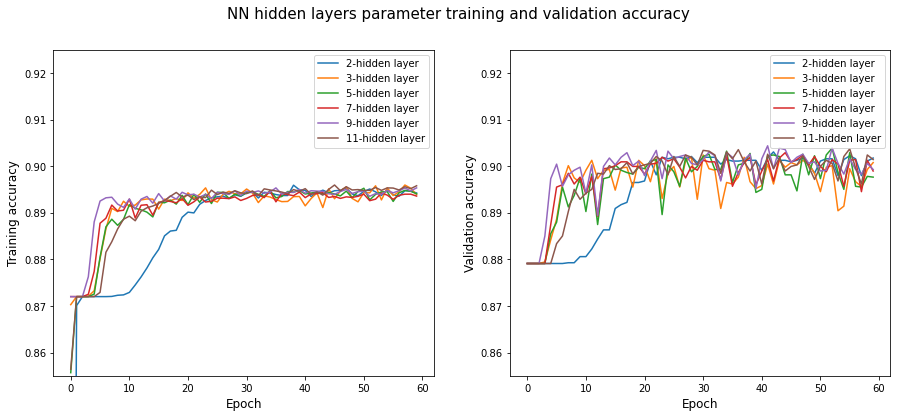

In [ ]:
plot_nn_training_n_validation_acc(nn_model_hists_hlayers, 'hidden layers')

From the plots above, it is observed that as the number of hidden layers is increased, the model performance is also improved. The mean accuracy reduces when the hidden layers are more than nine.

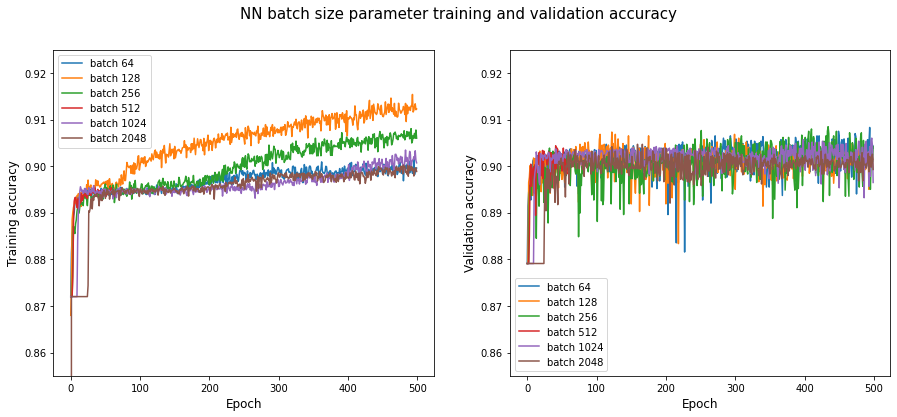

In [ ]:
plot_nn_training_n_validation_acc(nn_model_hists_bs, 'batch size')

In the plots above, when the batch size is set to 128, maximum training accuracy is attained. However, as the validation accuracies for all the batch sizes are approximately the same, we cannot rush with 128 batch size. Often higher testing accuracies point towards possible model overfitting. Thus, models trained with 128, 256 and 512 batch sizes are considered for further investigation.

Function to print the classification report of the neural network model

In [ ]:
def print_nn_analysis_report(model, X, y, model_name=None): 
    """
    This function prints the model performance analysis report and plots the confusion matrix too.  
    """
    y_true = y

    # Predict class using trained model
    model_predictions = model.predict(X)
    y_pred = np.array([1 if p > 0.5 else 0 for p in model_predictions])
    
    if model_name is None:
        model_name = ''

    print(f"------------- {model_name} Model Analysis Report --------------\n")
    print("Classification Accuracy :", round(accuracy_score(y_true, y_pred)*100, 3), "%")
    print("Balanced Accuracy :", round(balanced_accuracy_score(y_true, y_pred)*100, 3), "%")
    print("F1 score :", round(f1_score(y_true, y_pred, average='weighted')*100, 3), "%")
    print("Misclassification Rate :", round((1-accuracy_score(y_true, y_pred))*100, 3), "%")

    print(f"\n------------- {model_name} Model Classification Report --------------\n")
    print(classification_report(y_true, y_pred, target_names=['No', 'Yes']))
    
    print(f"\n------------- {model_name} Model Confusion Matrix --------------\n")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='PuRd', display_labels=['No', 'Yes'])
    plt.show()

1. Best NN Model-1 (9 hidden layers, ReLU activation function, BCE Loss, Adam optimizer, 128 batch size and 500 epochs)

953/953 [==============================] - 1s 1ms/step
------------- Best NN Model-1 Model Analysis Report --------------

Classification Accuracy : 91.171 %
Balanced Accuracy : 78.223 %
F1 score : 91.002 %
Misclassification Rate : 8.829 %

------------- Best NN Model-1 Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     26620
         Yes       0.67      0.61      0.64      3858

    accuracy                           0.91     30478
   macro avg       0.80      0.78      0.79     30478
weighted avg       0.91      0.91      0.91     30478


------------- Best NN Model-1 Model Confusion Matrix --------------



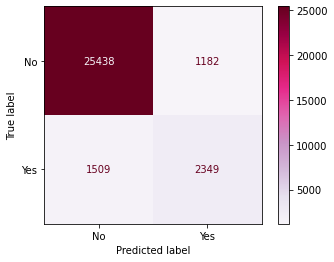

In [ ]:
best_nn_model_1 = nn_9_hl_model_bs128
print_nn_analysis_report(best_nn_model_1, X_train, y_train, model_name='Best NN Model-1')

2. Best NN Model-2 (9 hidden layers, ReLU activation function, BCE Loss, Adam optimizer, 256 batch size and 500 epochs)

953/953 [==============================] - 2s 2ms/step
------------- Best NN Model-2 Model Analysis Report --------------

Classification Accuracy : 90.885 %
Balanced Accuracy : 75.832 %
F1 score : 90.526 %
Misclassification Rate : 9.115 %

------------- Best NN Model-2 Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.94      0.96      0.95     26620
         Yes       0.67      0.56      0.61      3858

    accuracy                           0.91     30478
   macro avg       0.80      0.76      0.78     30478
weighted avg       0.90      0.91      0.91     30478


------------- Best NN Model-2 Model Confusion Matrix --------------



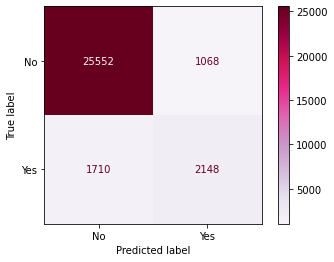

In [ ]:
best_nn_model_2 = nn_9_hl_model_bs256
print_nn_analysis_report(best_nn_model_2, X_train, y_train, model_name='Best NN Model-2')

3. Best NN Model-3 (9 hidden layers, ReLU activation function, BCE Loss, Adam optimizer, 512 batch size and 500 epochs)

953/953 [==============================] - 1s 1ms/step
------------- Best NN Model-3 Model Analysis Report --------------

Classification Accuracy : 90.242 %
Balanced Accuracy : 73.07 %
F1 score : 89.695 %
Misclassification Rate : 9.758 %

------------- Best NN Model-3 Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.93      0.96      0.95     26620
         Yes       0.65      0.50      0.57      3858

    accuracy                           0.90     30478
   macro avg       0.79      0.73      0.76     30478
weighted avg       0.89      0.90      0.90     30478


------------- Best NN Model-3 Model Confusion Matrix --------------



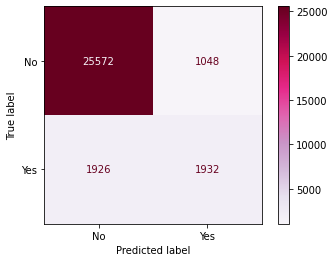

In [ ]:
best_nn_model_3 = nn_9_hl_model_ep500
print_nn_analysis_report(best_nn_model_3, X_train, y_train, model_name='Best NN Model-3')

Among the best NN models chosen, the model trained with batch size of 128(best_nn_model_1) outperforms the other best models in terms of misclassification rate and F1-score. This could be due to model overfitting. Thus, NN model trained with batch sizes of 128, 256, and 512 must be evaluated with the testing data before chosing the best model.

## 6. Comparison of metrics performance for testing 


### a) Examining over-fitting (4 marks)

Best SVM models

In [ ]:
print("----------------SVM-RBF model-------------------")
print("Training accuracy: ", round(best_rbf_svm.score(X_train, y_train)*100, 3), "%")
print("Testing accuracy: ", round(best_rbf_svm.score(X_test, y_test)*100, 3), "%")
print()
print("----------------SVM-Linear model-------------------")
print("Training accuracy: ", round(best_linear_svm.score(X_train, y_train)*100, 3), "%")
print("Testing accuracy: ", round(best_linear_svm.score(X_test, y_test)*100, 3), "%")
print()
print("----------------SVM-Poly model-------------------")
print("Training accuracy: ", round(best_poly_svm.score(X_train, y_train)*100, 3), "%")
print("Testing accuracy: ", round(best_poly_svm.score(X_test, y_test)*100, 3), "%")

----------------SVM-RBF model-------------------
Training accuracy:  91.043 %
Testing accuracy:  91.392 %

----------------SVM-Linear model-------------------
Training accuracy:  89.862 %
Testing accuracy:  90.356 %

----------------SVM-Poly model-------------------
Training accuracy:  89.947 %
Testing accuracy:  89.806 %


As seen from the training and testing accuracies presented above, none of the SVM models are actually overfitting. Hence, SVM models' performance is at par with respect to overfitting irrespective of the SVM kernel chosen. 

Best ANN models

In [ ]:
print("----------------ANN model 1-------------------")
print("Training accuracy: ", round(best_nn_model_1.evaluate(X_train, y_train, verbose=0)[1]*100, 3), "%")
print("Testing accuracy: ", round(best_nn_model_1.evaluate(X_test, y_test, verbose=0)[1]*100, 3), "%")
print()
print("----------------ANN model 2-------------------")
print("Training accuracy: ", round(best_nn_model_2.evaluate(X_train, y_train, verbose=0)[1]*100, 3), "%")
print("Testing accuracy: ", round(best_nn_model_2.evaluate(X_test, y_test, verbose=0)[1]*100, 3), "%")
print()
print("----------------ANN model 3-------------------")
print("Training accuracy: ", round(best_nn_model_3.evaluate(X_train, y_train, verbose=0)[1]*100, 3), "%")
print("Testing accuracy: ", round(best_nn_model_3.evaluate(X_test, y_test, verbose=0)[1]*100, 3), "%")

----------------ANN model 1-------------------
Training accuracy:  91.171 %
Testing accuracy:  88.317 %

----------------ANN model 2-------------------
Training accuracy:  90.885 %
Testing accuracy:  89.094 %

----------------ANN model 3-------------------
Training accuracy:  90.242 %
Testing accuracy:  90.55 %


From the accuracies presented above, among the three chosen NN models, model-1 and model-2 are overfitting to a smaller extent. However, model-3 is not showing any overfitting as its testing and training accuracies are very close.

### b) Comparison with appropriate metrics for testing (4 marks)

#### Testing analysis of SVM Models

------------- SVM-RBF Model Analysis Report --------------

Classification Accuracy : 91.392 %
Balanced Accuracy : 74.445 %
F1 score : 90.879 %
Misclassification Rate : 8.608 %

------------- SVM-RBF Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.94      0.97      0.95      2720
         Yes       0.68      0.52      0.59       370

    accuracy                           0.91      3090
   macro avg       0.81      0.74      0.77      3090
weighted avg       0.91      0.91      0.91      3090


------------- SVM-RBF Model Confusion Matrix --------------



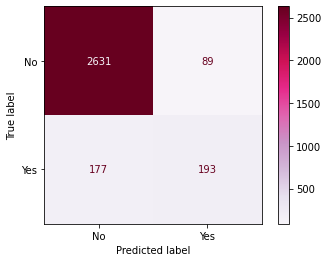

In [ ]:
print_nn_analysis_report(best_rbf_svm, X_test, y_test, model_name='SVM-RBF')

------------- SVM-Linear Model Analysis Report --------------

Classification Accuracy : 90.356 %
Balanced Accuracy : 70.821 %
F1 score : 89.626 %
Misclassification Rate : 9.644 %

------------- SVM-Linear Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.93      0.97      0.95      2720
         Yes       0.64      0.45      0.53       370

    accuracy                           0.90      3090
   macro avg       0.78      0.71      0.74      3090
weighted avg       0.89      0.90      0.90      3090


------------- SVM-Linear Model Confusion Matrix --------------



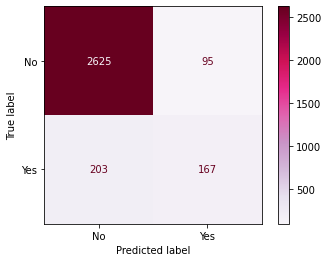

In [ ]:
print_nn_analysis_report(best_linear_svm, X_test, y_test, model_name='SVM-Linear')

------------- SVM-Polynomial Model Analysis Report --------------

Classification Accuracy : 89.806 %
Balanced Accuracy : 72.844 %
F1 score : 89.476 %
Misclassification Rate : 10.194 %

------------- SVM-Polynomial Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.93      0.95      0.94      2720
         Yes       0.59      0.51      0.54       370

    accuracy                           0.90      3090
   macro avg       0.76      0.73      0.74      3090
weighted avg       0.89      0.90      0.89      3090


------------- SVM-Polynomial Model Confusion Matrix --------------



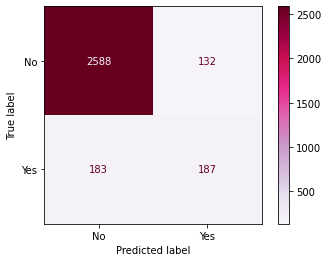

In [ ]:
print_nn_analysis_report(best_poly_svm, X_test, y_test, model_name='SVM-Polynomial')

#### Testing analysis of ANN models

97/97 [==============================] - 0s 1ms/step
------------- ANN Model 1 (BS-128) Model Analysis Report --------------

Classification Accuracy : 88.317 %
Balanced Accuracy : 77.486 %
F1 score : 88.847 %
Misclassification Rate : 11.683 %

------------- ANN Model 1 (BS-128) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.95      0.92      0.93      2720
         Yes       0.51      0.63      0.56       370

    accuracy                           0.88      3090
   macro avg       0.73      0.77      0.75      3090
weighted avg       0.90      0.88      0.89      3090


------------- ANN Model 1 (BS-128) Model Confusion Matrix --------------



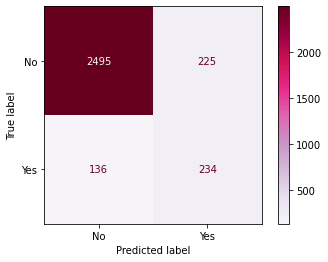

In [ ]:
print_nn_analysis_report(best_nn_model_1, X_test, y_test, model_name='ANN Model 1 (BS-128)')

97/97 [==============================] - 0s 1ms/step
------------- ANN Model 2 (BS-256) Model Analysis Report --------------

Classification Accuracy : 89.094 %
Balanced Accuracy : 75.008 %
F1 score : 89.187 %
Misclassification Rate : 10.906 %

------------- ANN Model 2 (BS-256) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.94      0.94      0.94      2720
         Yes       0.54      0.56      0.55       370

    accuracy                           0.89      3090
   macro avg       0.74      0.75      0.75      3090
weighted avg       0.89      0.89      0.89      3090


------------- ANN Model 2 (BS-256) Model Confusion Matrix --------------



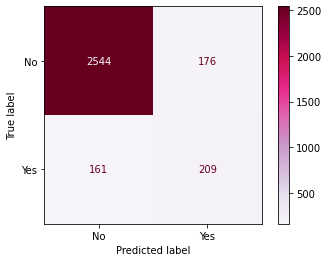

In [ ]:
print_nn_analysis_report(best_nn_model_2, X_test, y_test, model_name='ANN Model 2 (BS-256)')

97/97 [==============================] - 0s 2ms/step
------------- ANN Model 3 (BS-512) Model Analysis Report --------------

Classification Accuracy : 90.55 %
Balanced Accuracy : 76.069 %
F1 score : 90.401 %
Misclassification Rate : 9.45 %

------------- ANN Model 3 (BS-512) Model Classification Report --------------

              precision    recall  f1-score   support

          No       0.94      0.95      0.95      2720
         Yes       0.61      0.57      0.59       370

    accuracy                           0.91      3090
   macro avg       0.78      0.76      0.77      3090
weighted avg       0.90      0.91      0.90      3090


------------- ANN Model 3 (BS-512) Model Confusion Matrix --------------



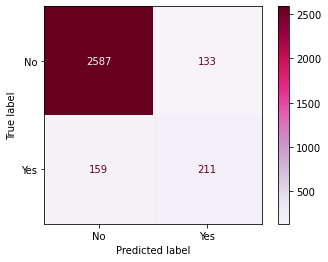

In [ ]:
print_nn_analysis_report(best_nn_model_3, X_test, y_test, model_name='ANN Model 3 (BS-512)')

### c) Model selection (4 marks)

When the training and testing accuracies of all the models are invstigated, it is observed that the SVM models don't suffer from overfitting unlike the artificial neural network models. However, from the analysis reports presented above, it is seen that the balanced accuracies obtained for all of the SVM models are lower compared to that of the ANN models. 

In contrast, all the ANN models have higher number of true positives than the SVM models which is crucial for our classification task, as we have fewer datapoints for positive cases compared to the negative ones.

To conclude, the recommended model is a ANN *model-1(best_nn_model_1)* with highest recall(true positive rate) among all the best models trained and evaluated in this project.


In [ ]:
best_nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 50)                2050      
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1

In [ ]:
models.save_model(best_nn_model_1, 'best_trained_nn_model.h5')

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)


* Overfitting: The best model does show some overfitting to a small 
extent because it is trained with highly imbalanced data. However, the training accuracy obtained with the best model is 91.171% and the testing accuracy is 88.317% which is not too distant. Thus, the model is not suffering from heavy overfitting.

* Complexity: As the recommended model is an artificial neural network, complex architecture is unavoidable. The best model consists of nine hidden layers apart from an input layer and an output layer. The total number of model parameters is 8611, which is not a large number considering the CNNs and RNNs.

* Efficiency: The best model is quite efficient from a timing and resource consumption point of view. It took around 15 minutes to train the best neural network model for 500 epochs with a batch size of 128 and 8611 trainable parameters.

* Robustness: The best model’s training and testing performances have no surprises. It really got trained well even with the unbalanced data and this shows how robust the best NN model is.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)

* Generalization: As the best model is not suffering from acute overfitting, it can generalize well with new data.

* Light-weightedness: The model contains 8611 trainable parameters, and it takes hardly any time to get trained. Thus, it is a portable model.

* Relevance: The neural network can easily trained with imbalanced data which is quite frequent in the banking domain.

* Adaptibilty: The best neural network is not very complicated and hence can be easily trained with new datasets over time.

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)

The following accomplishments were made successfully:

* I could satisfactorily train both models with the highly imbalanced data.

* I managed to carry out a lot of hyperparameter tuning to avoid model overfitting

* I could compare the training, validation, and testing performances of the SVM and ANN models to understand their differences.

* Lastly, I could build models with good recall that can predict well with the given dataset.

The following were unsuccessful in this project:

* Could not train the NN model for more than 500 epochs due to resource constraints.

* Could not train SVM polynomial kernel with higher values of hyperparameter "degree" as with the higher value of "degree" the training becomes quite slow and takes up a lot of computational resources.

* Could not try other SVM Kernels as extensive grid search is time-consuming.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (4 marks)

Given another chance I would do the following :

* I would train the NN models for more than 500 epochs as I obtained the highest accuracy with 500 epochs and could not go beyond 500 due to time constraints.

* I would surely explore other SVM kernel options like the sigmoid kernel and Gram matrix.

* I would also tune the SVM model for polynomial kernel with different "gamma" and "degree" parameters for a broader range.

* Lastly, I would try to discretize the data for investigating its effect on the model performance.

### c) Provide a wish list of future work that you would like to do (4 marks)

The scope of development for this project is huge. The following major works can be carried out in the future on this project:

* Use of bayesian network models for classifying the bank marketing dataset.

* Use of ensemble techniques comprising deterministic and probabilistic models for the classification task at hand.

* Extensive grid search for the Neural Network models.

* Exploring the effect of oversampling and undersampling of the dataset on the model’s performance.